# Insurance Claim Fraud Detection Project

## Importing Libraries

In [1]:
#Import libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

Importing all required libraries

## Loading the Dataset

In [2]:
#Import the dataset

df_insurance = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv")
df_insurance

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


We see that our dataset consists of a total of 1000 rows and 40 columns. There are numerical data columns as well as categorical data columns in the dataset. Later, we have to convert the categorical columns to numerical to train our model. As we are supposed to predict the 'fraud_reported' column which is object data column so this makes it a Classification problem.

## Shape of data with number of rows and columns


In [3]:
df_insurance.shape

(1000, 40)

There are 1000 rows and 40 columns in dataset

In [4]:
#checking column names
df_insurance.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [5]:
#checking the datatype information
df_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

Here we can see that there are 2 float datatype columns, 17 numerical datatype columns and 21 object datatype columns present in our dataset.

## Statistical Analysis

In [6]:
df_insurance.describe().T

,count,mean,std,min,25%,50%,75%,max
months_as_customer,1000.0,2.039540e+02,1.151132e+02,0.00,115.7500,199.5,276.250,479.00
age,1000.0,3.894800e+01,9.140287e+00,19.00,32.0000,38.0,44.000,64.00
policy_number,1000.0,5.462386e+05,2.570630e+05,100804.00,335980.2500,533135.0,759099.750,999435.00
policy_deductable,1000.0,1.136000e+03,6.118647e+02,500.00,500.0000,1000.0,2000.000,2000.00
policy_annual_premium,1000.0,1.256406e+03,2.441674e+02,433.33,1089.6075,1257.2,1415.695,2047.59
umbrella_limit,1000.0,1.101000e+06,2.297407e+06,-1000000.00,0.0000,0.0,0.000,10000000.00
insured_zip,1000.0,5.012145e+05,7.170161e+04,430104.00,448404.5000,466445.5,603251.000,620962.00
capital-gains,1000.0,2.512610e+04,2.787219e+04,0.00,0.0000,0.0,51025.000,100500.00
capital-loss,1000.0,-2.679370e+04,2.810410e+04,-111100.00,-51500.0000,-23250.0,0.000,0.00
incident_hour_of_the_day,1000.0,1.164400e+01,6.951373e+00,0.00,6.0000,12.0,17.000,23.00


- We can see all the columns except for '_c39' are having 1000 count which indicates it doesn't contain any missing values.
- Mean is greater than median in all the columns which indicates that data is skewed.
- Standard Deviation is higher in all features which indicates data is heavily spreaded.
- Large difference between 75th percentile and max is present in 'umbrella_limit' column which indicates outliers may be there which we will be checking later.

## Datatypes of all columns

In [7]:
df_insurance.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

- policy_annual_premium and _c39 columns are having integer datatype.
- months_as_customer, age, policy_number, policy_deductable, umbrella_limit, insured_zip, capital_gains, capital_loss, incident_hour_of_the_day, number_of_vehicles_involved, bodily_injuries, witness, total_claim_amount, injured_claim, property_claim,vehicle_claim and auto_year- these are 17 columns which are having integer datatype 
- rest of the 21 columns are having object datatype.

## Checking for null values

In [8]:
#check for is there any null values present in the dataset 

df_insurance.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

<AxesSubplot:>

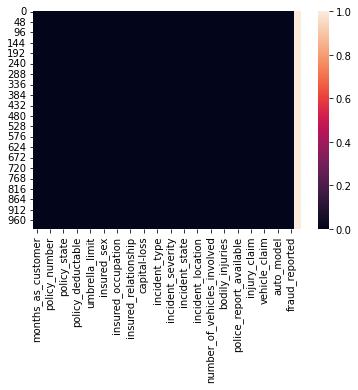

In [9]:
#To check missing values using heatmap
sns.heatmap(df_insurance.isnull())

Except for the '_c39' column which is entirely empty, all other columns have no any missing values. Hence, we can drop '_c39' column.

In [10]:
#checking unique values
df_insurance.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In the above cell, we can see the number of unique values each columns contains.

## Data Pre-processing

In [11]:
def preprocessing(df_insurance):
    df_insurance=df_insurance.copy()
    #Feature Engineering
    df_insurance['policy_bind_date']=pd.to_datetime(df_insurance['policy_bind_date'])
    df_insurance['policy_bind_year']=df_insurance['policy_bind_date'].dt.year
    df_insurance['policy_bind_month']=df_insurance['policy_bind_date'].dt.month
    df_insurance['policy_bind_day']=df_insurance['policy_bind_date'].dt.day
    #Dropping columns
    df_insurance.drop(['_c39','policy_bind_date','incident_location','incident_date'],axis=1,inplace=True)
    return df_insurance

In the above cell, we have separated the date object datatype columns into 3 columns for day, month and year; and we have also dropped some columns that are not useful for our model prediction.

In [12]:
df_insurance = preprocessing(df_insurance)
df_insurance

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_bind_year,policy_bind_month,policy_bind_day
0,328,48,521585,OH,250/500,1000,1406.91,0,466132,MALE,...,6510,13020,52080,Saab,92x,2004,Y,2014,10,17
1,228,42,342868,IN,250/500,2000,1197.22,5000000,468176,MALE,...,780,780,3510,Mercedes,E400,2007,Y,2006,6,27
2,134,29,687698,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,7700,3850,23100,Dodge,RAM,2007,N,2000,6,9
3,256,41,227811,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,6340,6340,50720,Chevrolet,Tahoe,2014,Y,1990,5,25
4,228,44,367455,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,1300,650,4550,Accura,RSX,2009,N,2014,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,OH,500/1000,1000,1310.80,0,431289,FEMALE,...,17440,8720,61040,Honda,Accord,2006,N,1991,7,16
996,285,41,186934,IL,100/300,1000,1436.79,0,608177,FEMALE,...,18080,18080,72320,Volkswagen,Passat,2015,N,2014,5,1
997,130,34,918516,OH,250/500,500,1383.49,3000000,442797,FEMALE,...,7500,7500,52500,Suburu,Impreza,1996,N,2003,2,17
998,458,62,533940,IL,500/1000,2000,1356.92,5000000,441714,MALE,...,5220,5220,36540,Audi,A5,1998,N,2011,11,18


In [13]:
#getting the list of float data type column names
num_data = []
for x in df_insurance.dtypes.index:
    if df_insurance.dtypes[x] == 'float64' or df_insurance.dtypes[x] == 'int64':
        num_data.append(x)
print(f"Continuous Columns:\n", num_data)

#getting list of object data type column names
obj_data = []
for x in df_insurance.dtypes.index:
    if df_insurance.dtypes[x] == 'object':
        obj_data.append(x)
print(f"Categorical Columns:\n", obj_data)

Continuous Columns:
 ['months_as_customer', 'age', 'policy_number', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year', 'policy_bind_year', 'policy_bind_month', 'policy_bind_day']
Categorical Columns:
 ['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']


# EDA (Exploratory Data Analysis)

## Uni Variate Analysis

Uni variate analysis works with only one variable, hence it is called as uni variate.

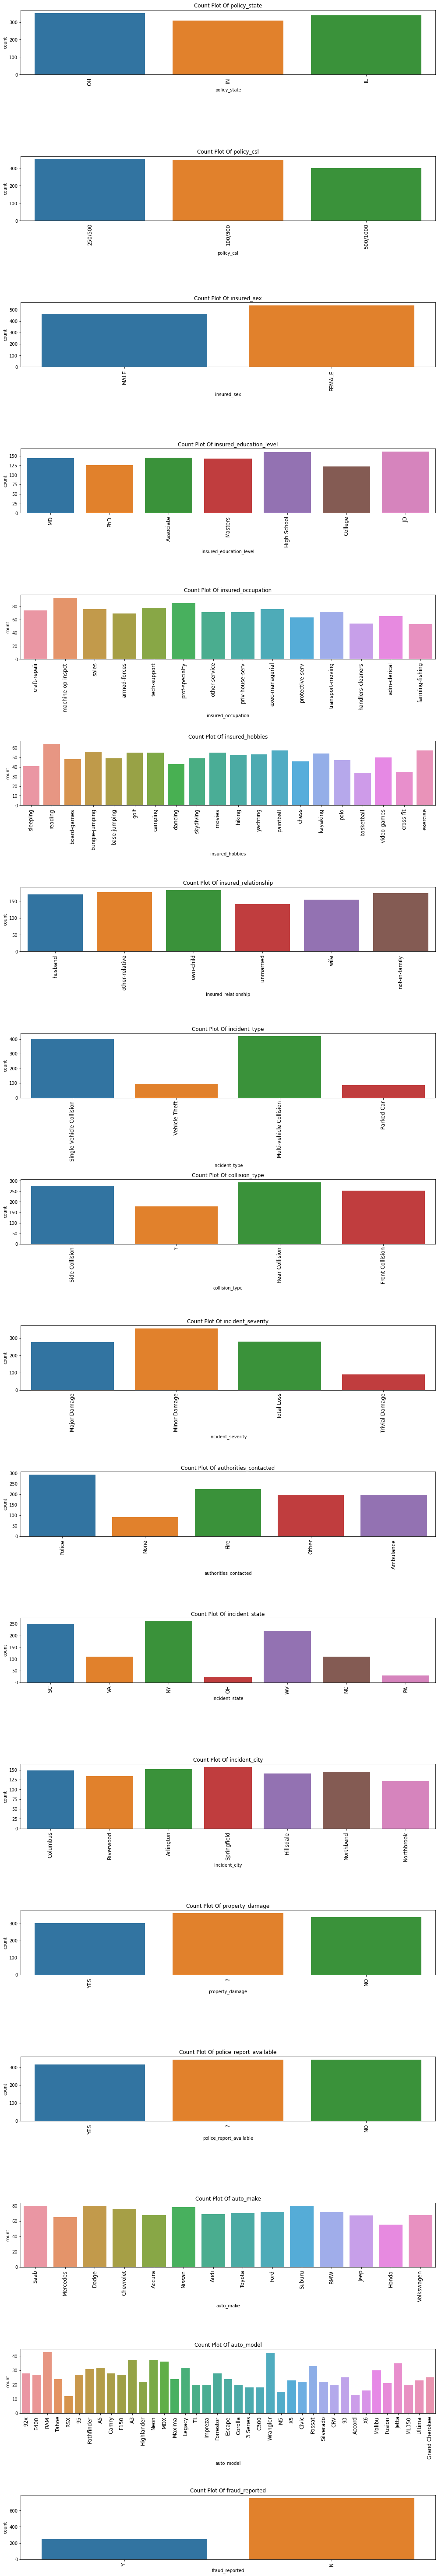

In [14]:
#plotting the plots
plt.figure(figsize=(14,100))
for i in range(len(obj_data)):
    plt.subplot(22,1,i+1)
    sns.countplot(df_insurance[obj_data[i]])
    plt.title(f"Count Plot Of {obj_data[i]}",fontsize=12)
    plt.xticks(rotation=90, fontsize=12)
    plt.tight_layout()

- From policy_state plot, we can see that IN has low count while IL and OH has almost same high count.
- From policy_cls plot, we can see that 250/500 and 100/300 has same highest count while 500/100 has less count.
- From insured_sex plot, we see that females have made more insurance claim than males.
- From insured_education_level plot, we see that JD and High school has almost same count which indicates that most of the people who claim insurance possesses these educational qualifications.
- From insured_occupation plot, we see that machine-op-inspct occupation has the high count while people who have farming-fishing occupation has made less insurance claim.
- From insured_hobbies plot, we see reading was the most popular among the people claiming insurance.
- From insured_relationship plot, we see that own-child has high count indicating most of the people who have claimed insurance have child while un-married has the least count.
- From incident type plot, we can see that Multi-vehicle Collision and Single-vehicle Collision has the highest count that indicates that mostly accident happened between multiple vehicles and with single vehicle. While very less accident happened with parked cars.
- From collision_type plot, we can see that rear collision has high count meaning people damage their vehicles probably from back side than front side.
- From incident_severity plot, we see that Minor damange has high count indicating mostly people claim insurance for minor damage while total loss and major damage has same count indicating that people also goes for these two kind for insurance claim.
- From authorities_contacted plot, we see that police has the highest count which means people have contacted the police first.
- From incident_state plot, We see that Newyork has the highest count means mostly accident happens there only and Ohio has the least count as comapre to all which indicates that Ohio has very less chance of accident happening.
- From incident_city plot, we see that Springfield has high count indicating that in Springfield there are high chances of getting into an accident and Northbrook has less count indicating there are less chances of accident happening.
- From property damage plot, ? and No has high count while yes has less count.
- From police_report_availabe plot, we can say that No has high count probably because less people were able to produce genuine reports claiming insurance.
- From auto_make plot, we see that Suburu,Dodge,Saab has the highest count which means they make more vehicles, while honda and mercedes have less count.
- From auto_model plot, we see that the vehicle models Wrangler and RAM has the highest count while RSX has the lowest count.
- From Fraud_reported plot, we see that No has high count while yes have less count which means less number of frauds have been reported.

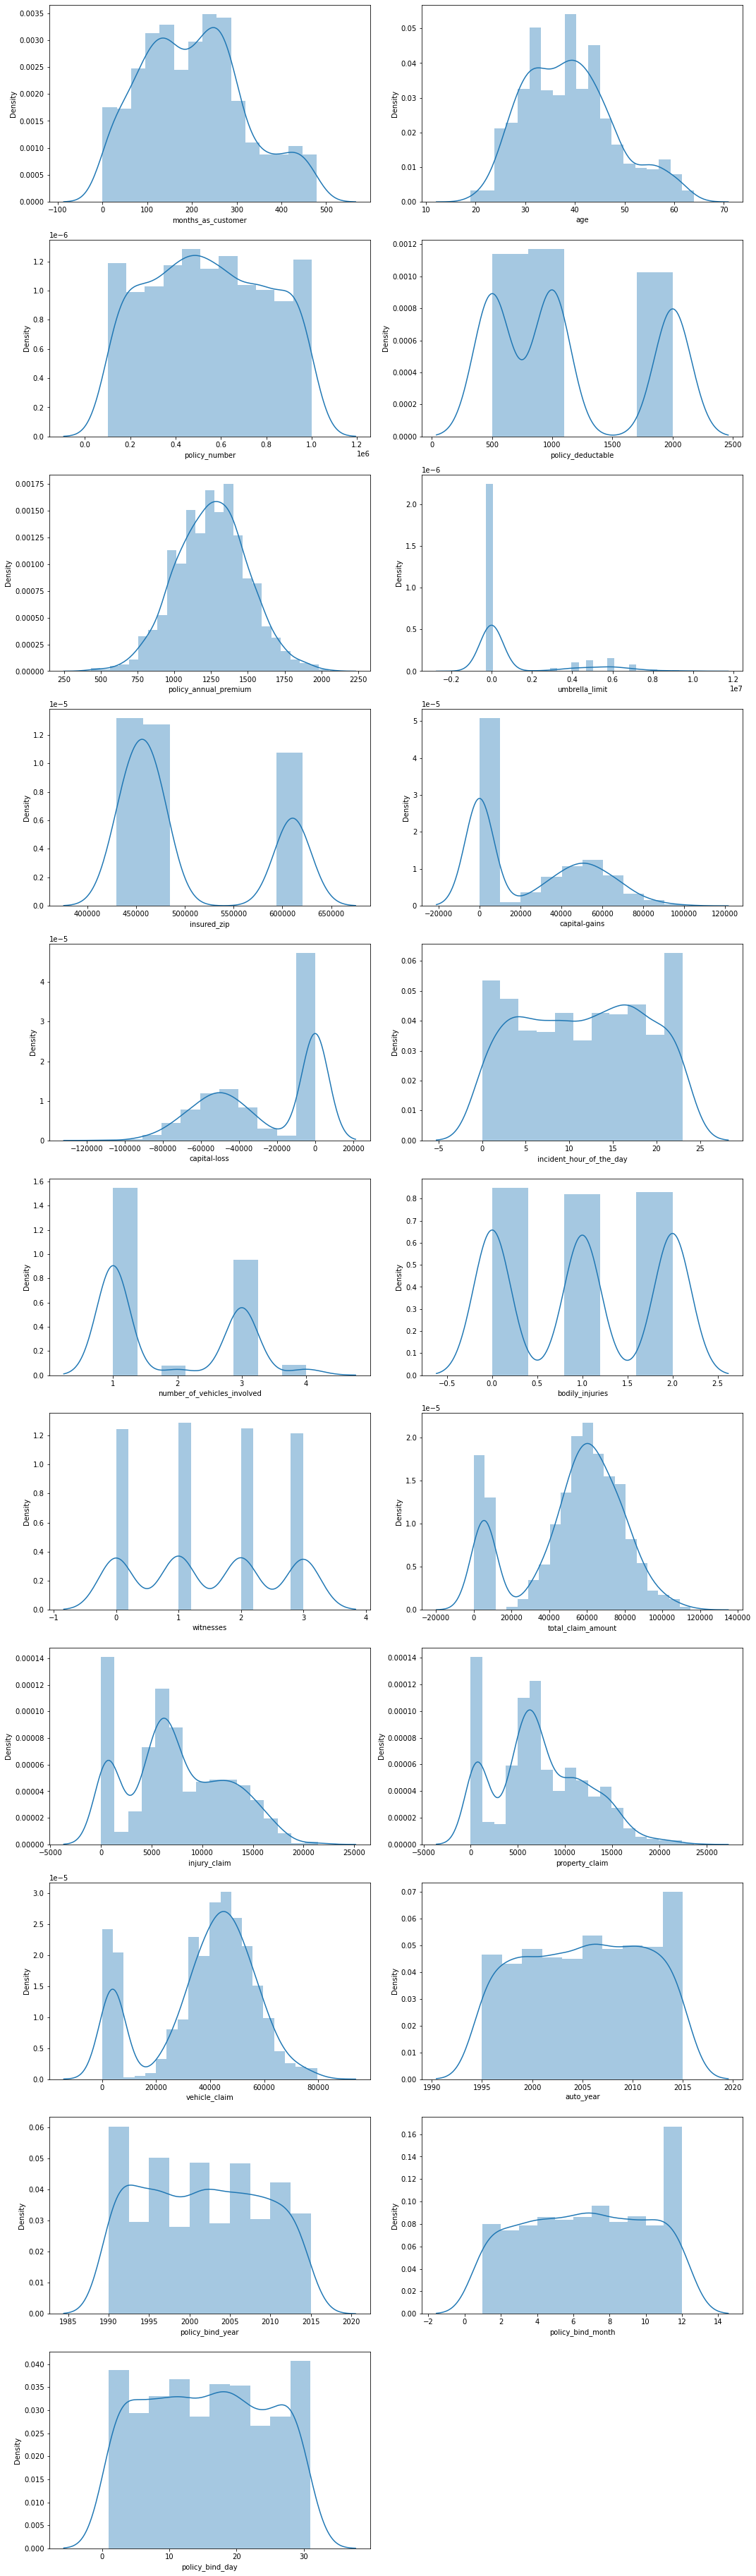

In [15]:
#Checking distribution plot 
plt.figure(figsize=(15,55))
for i in range(len(num_data)):
    plt.subplot(12,2,i+1)
    sns.distplot(df_insurance[num_data[i]])
    plt.tight_layout()

- From 'months_as_customer' plot, we can say that most people lies in between 0-100 and there are less no.of people who lies in 300-500 who are loyal customers.
- From distribution of 'age' plot, we can say that mostly people lies between 30-45 and less people in between 50-60.
- From 'policy_deductable' plot, we can say that the value is between 500-1000 and 17000-20000.
- From 'policy_annual_premium' plot, we see that data is normally distributed.
- From 'insured_zip' plot, we can say that the highest count lies between 43000 to 48000 value and lowest count lies between 59000 to 62000 values.
- From 'capital_gain' plot, we can see that 0-10000 has high peak and from capital_loss plot, 0-10000 has high peak while rest of the distribution are same for both the features.
- From 'incident_hour_of_the_day' plot, we can see that the maximum value counts are 0 to 23.
- From 'number_of_vehicles_involved' plot, we can see that the highest count is 1 followed by 3 and lowest count is 2 followed by 4.
- From 'bodily_injuries' plot, we can see that the count is 0 to 2 values for this feature.
- From 'witnesses' plot, we can see that the count is 0 to 3 values for this feature.
- From 'total_claim_amount' plot, we see that 0-10000 has high peak and rest of all values are normally distributed.
- From 'injury_claim' plot, we can say that mostly people have claim between 0-1000 values and followed by 18000 values.
- From distribution of 'property_claim' plot, we can say that mostly people have claim between 0-1000 values.
- From distribution of 'vehicle_claim' plot, we can say that there are many people who claim for 0-10000 values and rest of the value has normal distribution.
- From 'auto_year' plot, we can see that most of the count of this column is in 1995 and 2015.
- From 'policy_bind_year' plot, we can see that most of the people have taken policy in 1990 and 2015.
- From 'policy_bind_month' plot, we can see that highest no of the people have taken policy in the month of November while some no of the people have taken policy in all other months.
- From 'policy_bing_day' plot, we can see that for all the days of the entire month people have taken policy.

Categorical feature column: policy_state


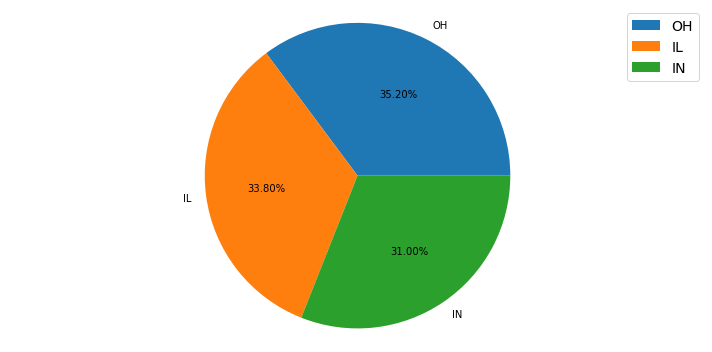

Categorical feature column: policy_csl


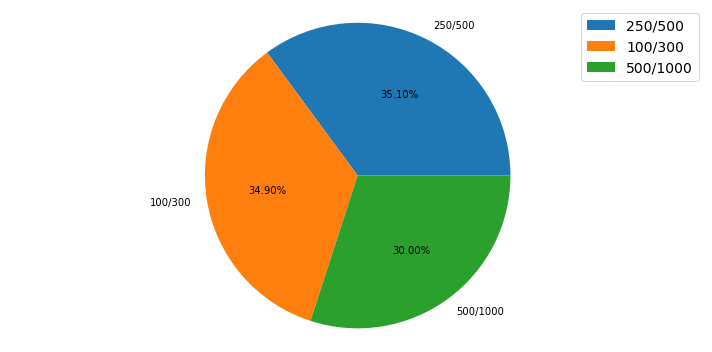

Categorical feature column: policy_deductable


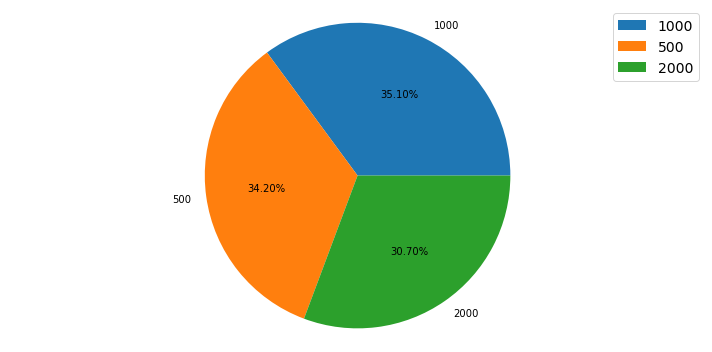

Categorical feature column: insured_sex


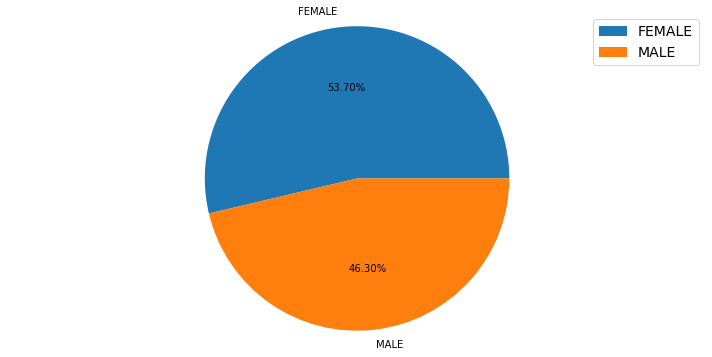

Categorical feature column: insured_education_level


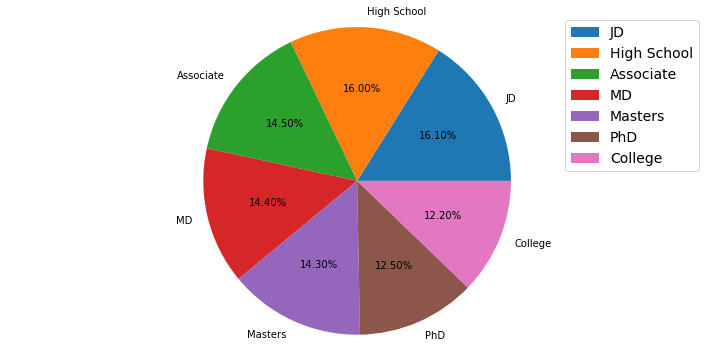

Categorical feature column: insured_occupation


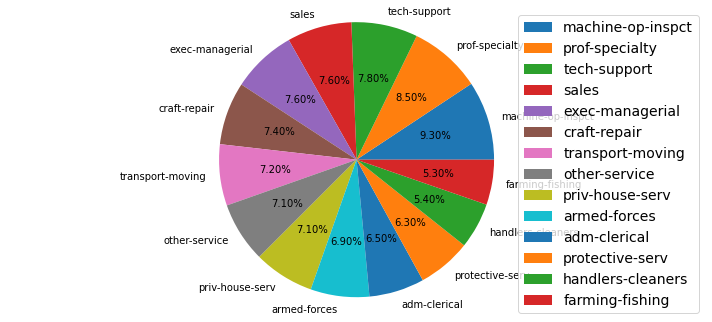

Categorical feature column: insured_relationship


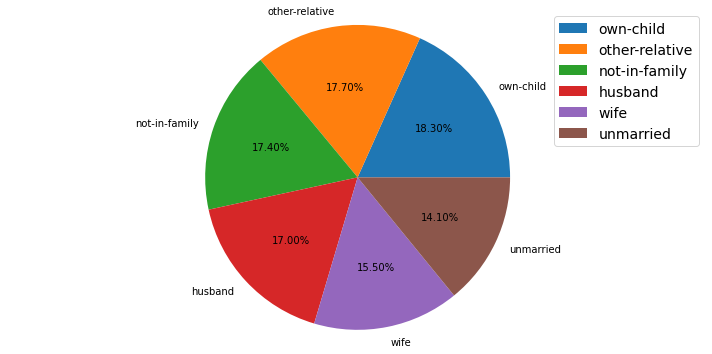

Categorical feature column: incident_type


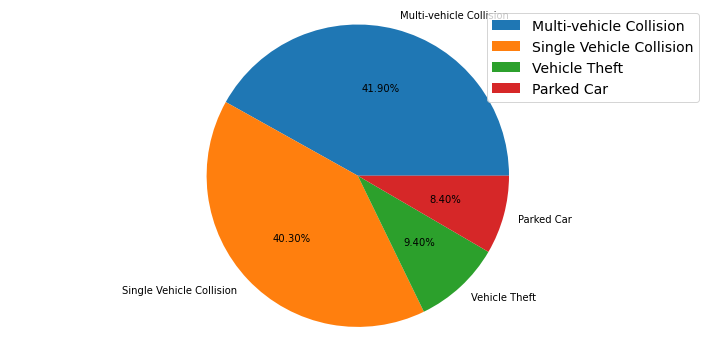

Categorical feature column: collision_type


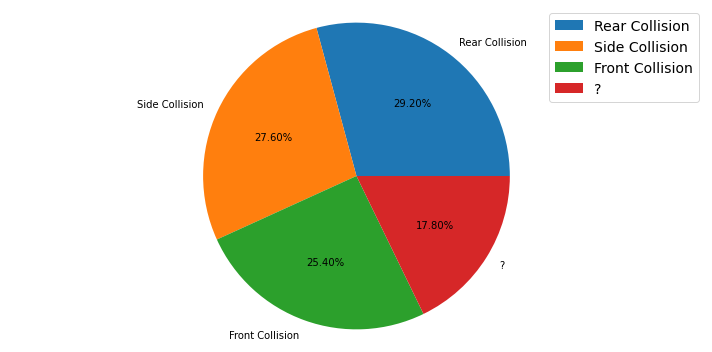

Categorical feature column: incident_severity


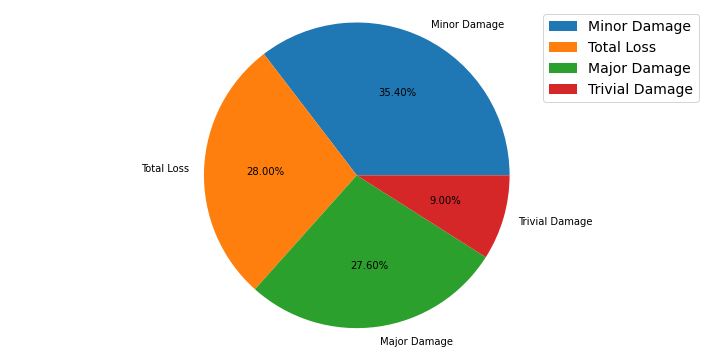

Categorical feature column: authorities_contacted


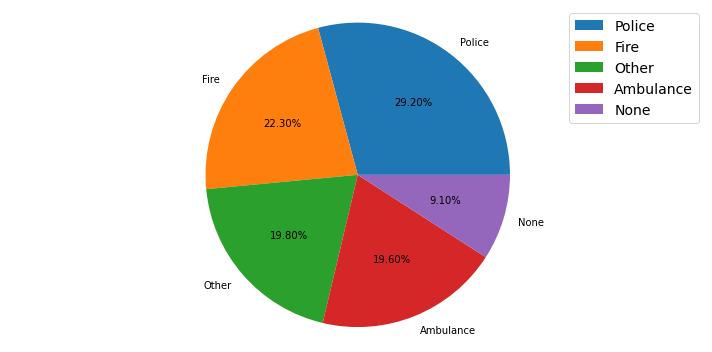

Categorical feature column: incident_state


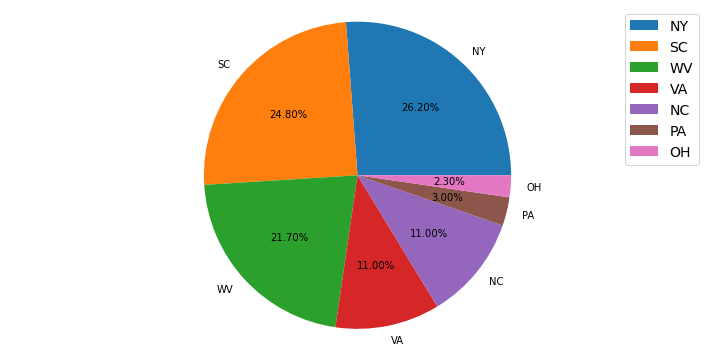

Categorical feature column: incident_city


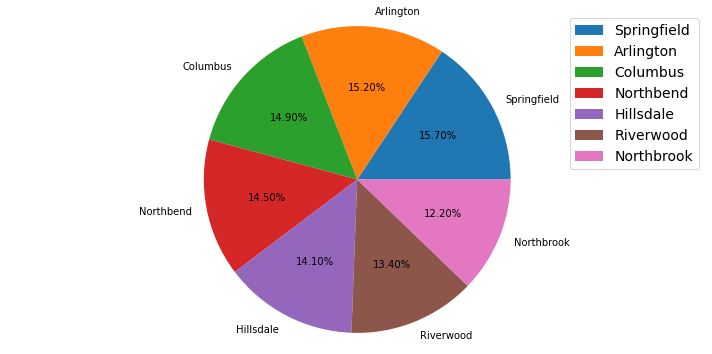

Categorical feature column: number_of_vehicles_involved


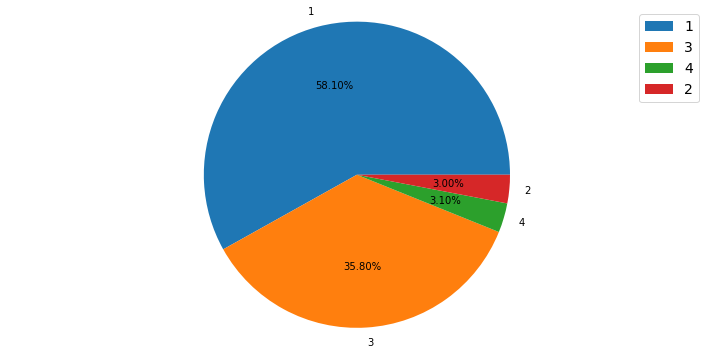

Categorical feature column: property_damage


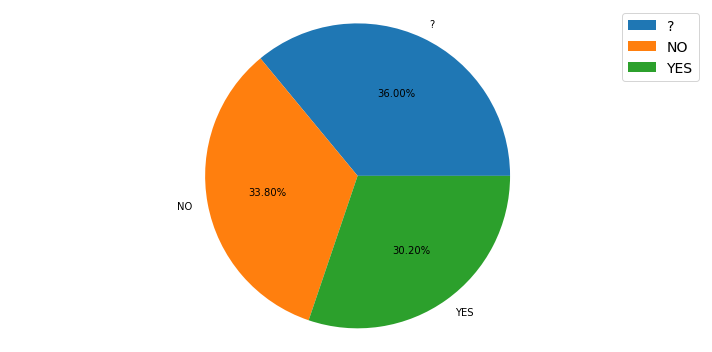

Categorical feature column: bodily_injuries


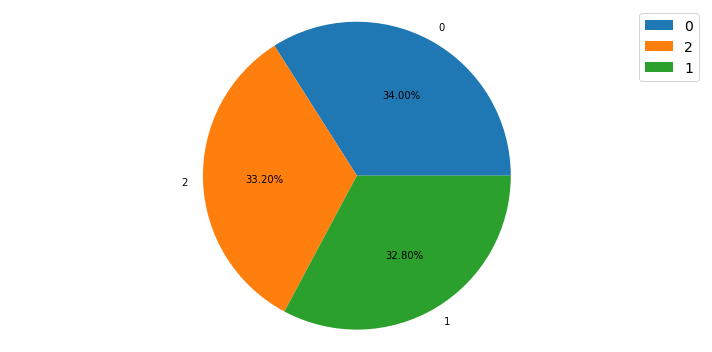

Categorical feature column: witnesses


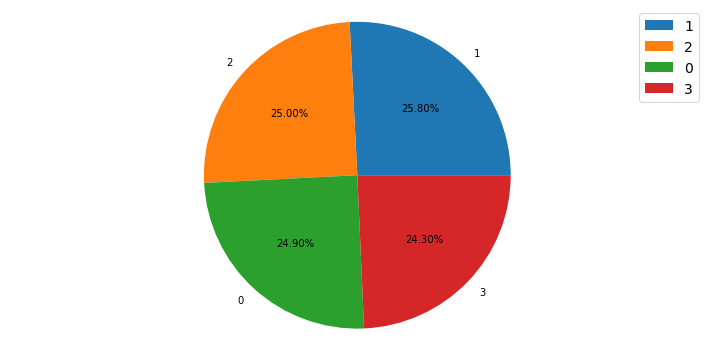

Categorical feature column: police_report_available


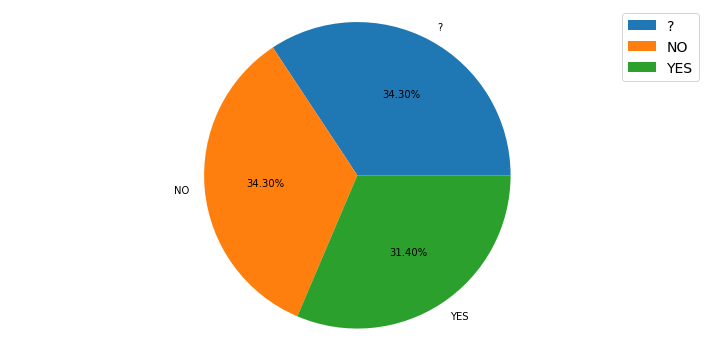

Categorical feature column: fraud_reported


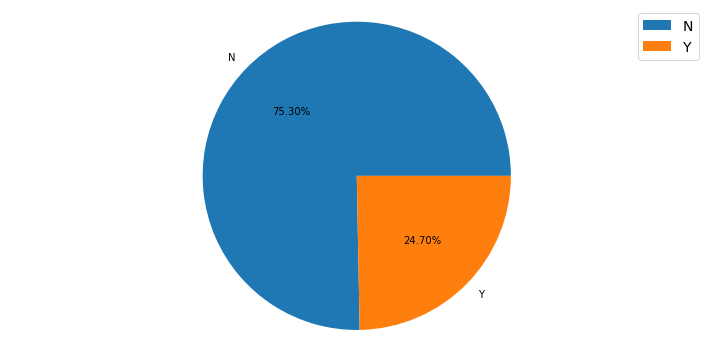

In [16]:
#Plotting pie-diagram for the categorical feature columns
def pie_diagram(x):
    plt.figure(figsize=(10,5))
    plt.pie(x.value_counts(), labels=x.value_counts().index, autopct='%1.2f%%')
    plt.legend(prop={'size':14})
    plt.axis('equal')
    plt.tight_layout()
    return plt.show()

cat_features = ['policy_state', 'policy_csl', 'policy_deductable','insured_sex', 'insured_education_level',
                'insured_occupation', 'insured_relationship', 'incident_type', 'collision_type',
                'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city',
                'number_of_vehicles_involved', 'property_damage', 'bodily_injuries', 'witnesses',
                'police_report_available', 'fraud_reported']

for i in df_insurance[cat_features]:
    print(f"Categorical feature column:", i)
    pie_diagram(df_insurance[i])

In the above cell, we have generated pie charts for the categorical columns which shows the pecentage of data that is distributed in the different unique values that each column contains. Here we can see that less number of data cover the yes portion of fraud reported and since this is our target label it indicates towards the problem of class imbalance as well. so later on we will balanced it.

## Bivariate Analysis

Bivariate Analysis works with two variables.

Text(0.5, 1.0, 'Total claim amount and Vehicle claim vs auto_year')

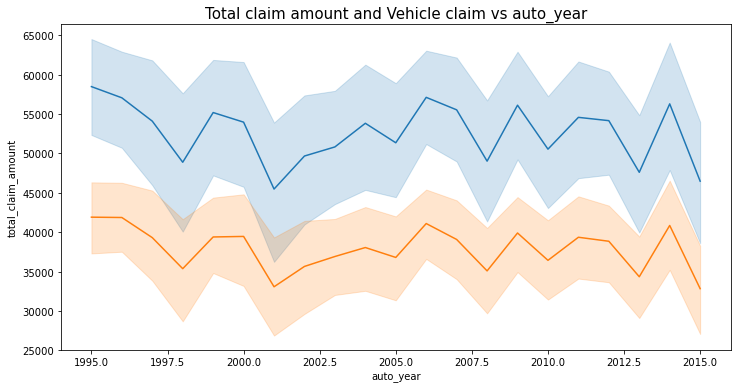

In [17]:
#checking lineplot
plt.figure(figsize=(12,6))
sns.lineplot(x='auto_year',y='total_claim_amount',data=df_insurance)
sns.lineplot(x='auto_year',y='vehicle_claim',data=df_insurance)
plt.title("Total claim amount and Vehicle claim vs auto_year",fontsize=15)

From the above plot, we see that total claim amount and vehicle claim have same kind of distribution but there is a difference in values i.e., total claim amount has high value count than vehicle claim.

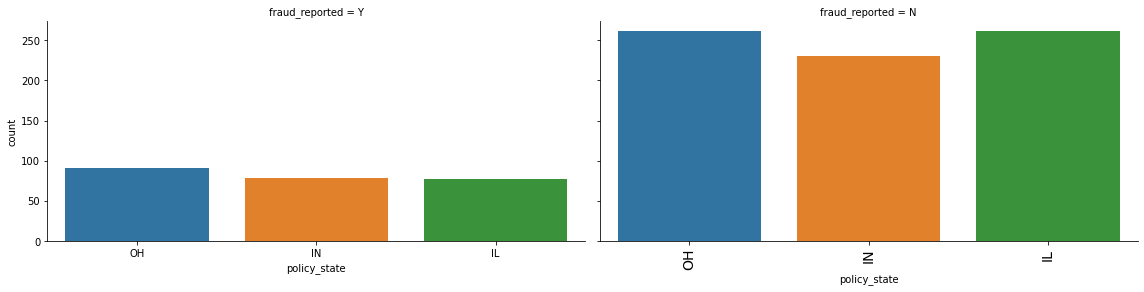

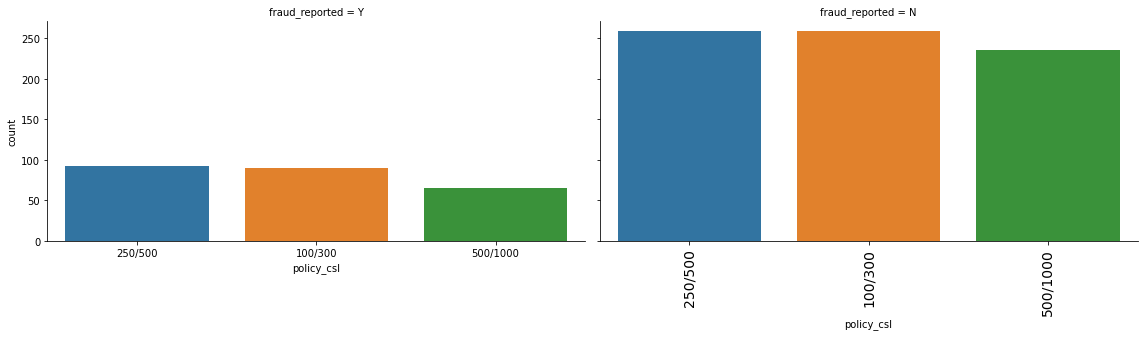

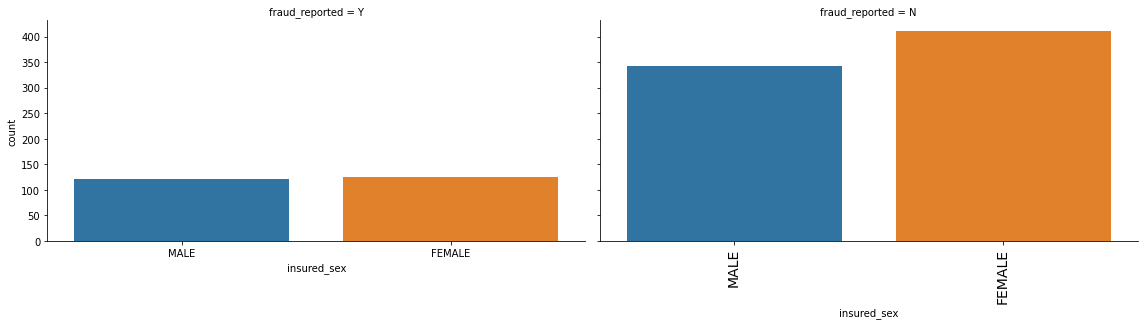

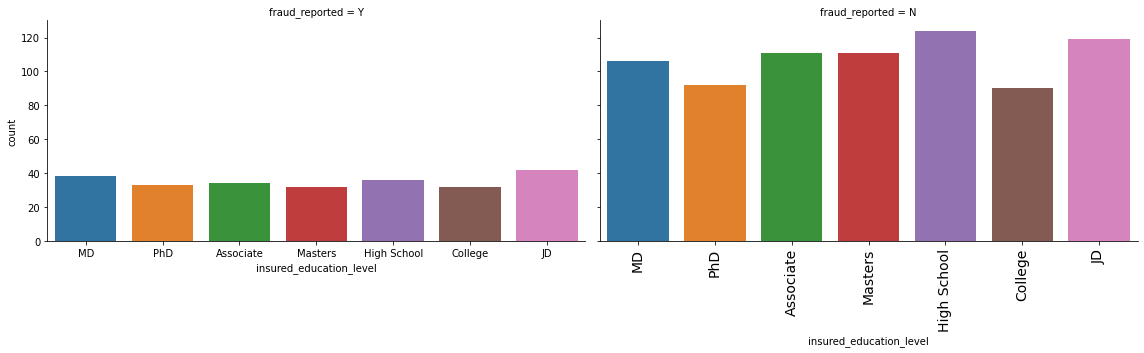

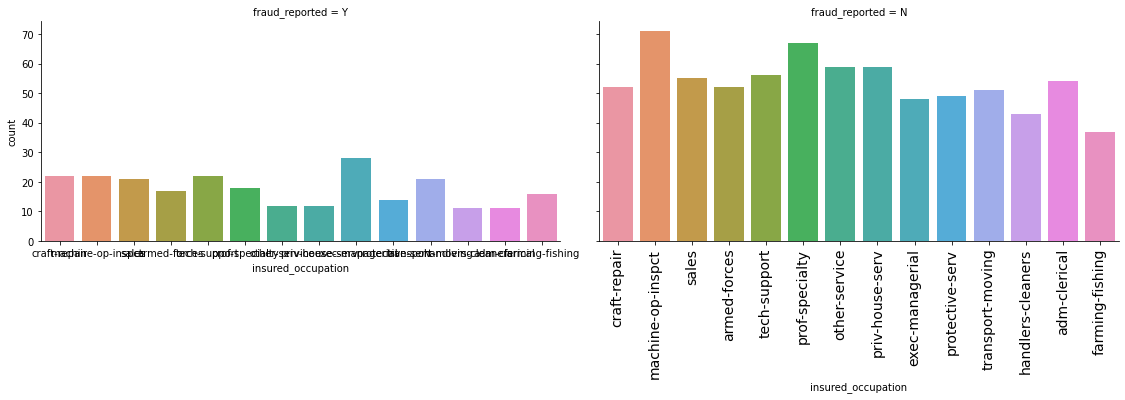

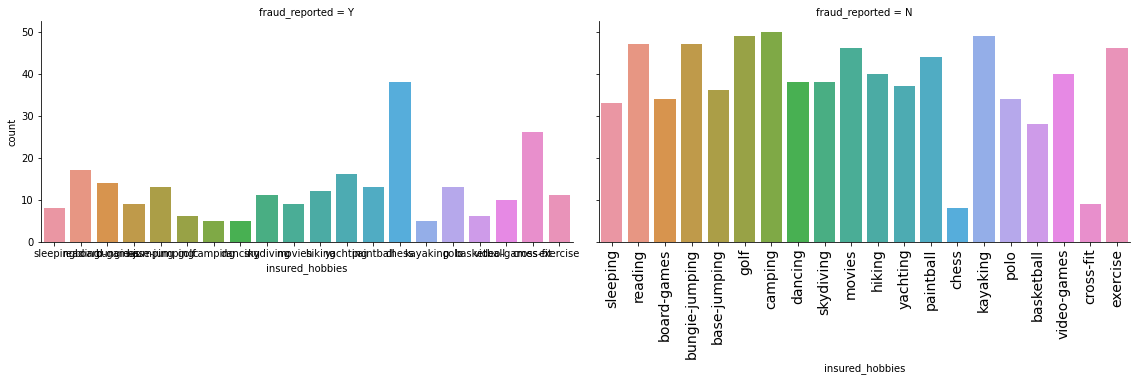

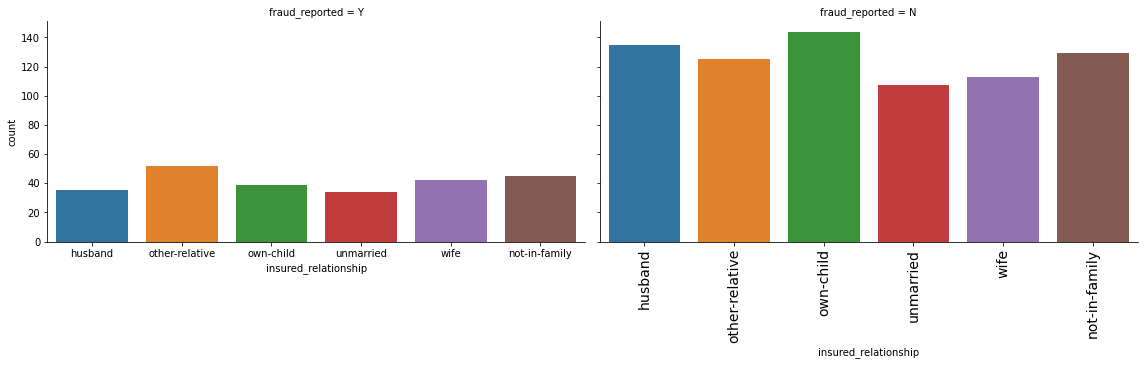

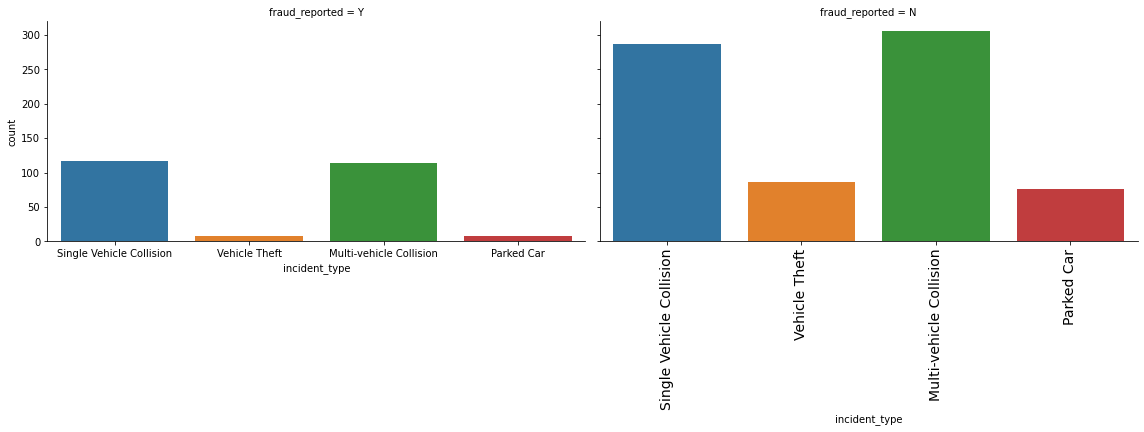

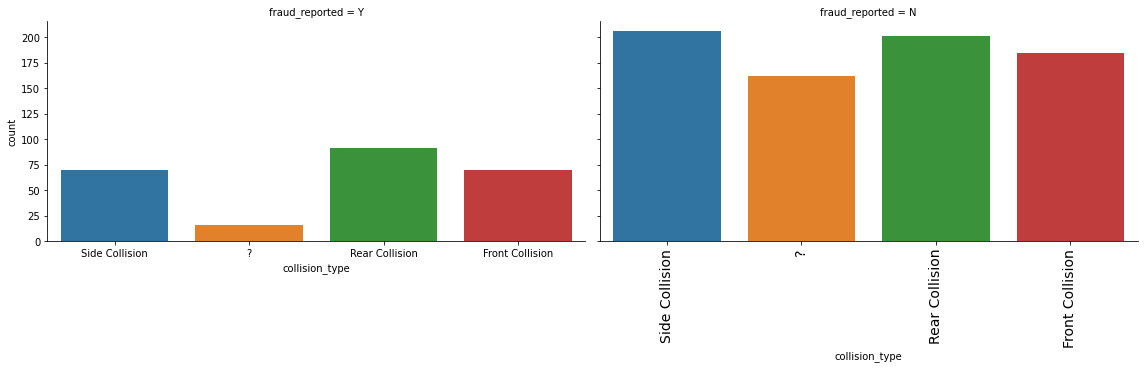

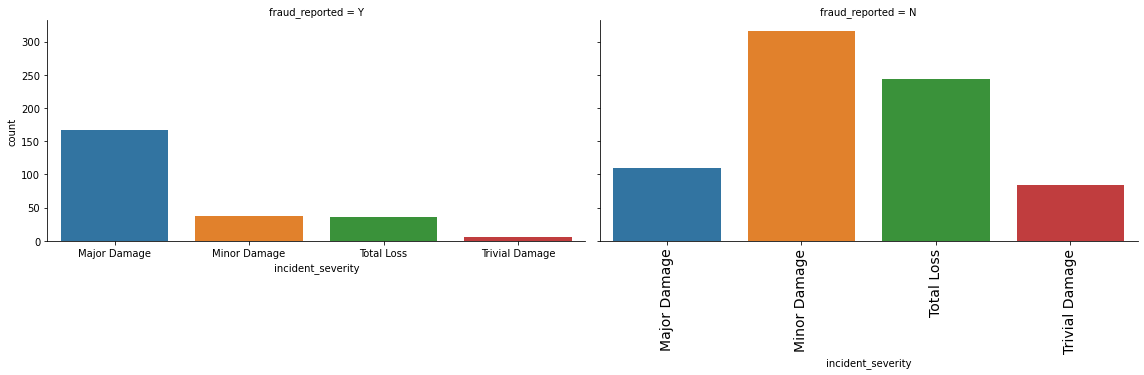

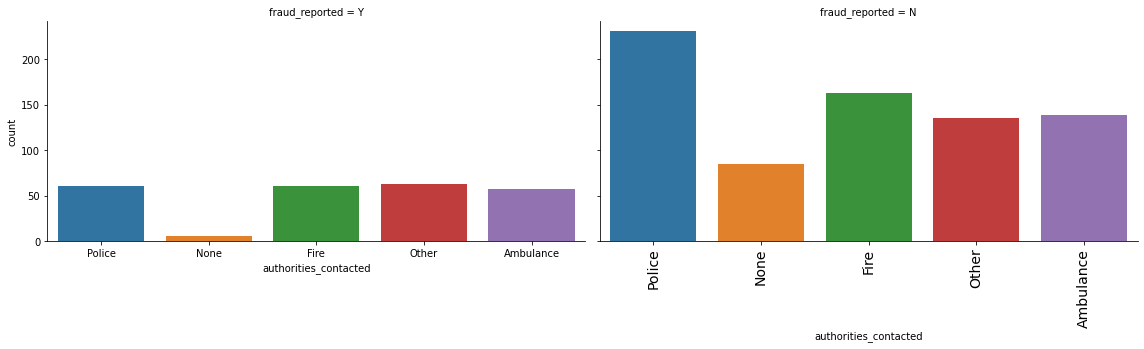

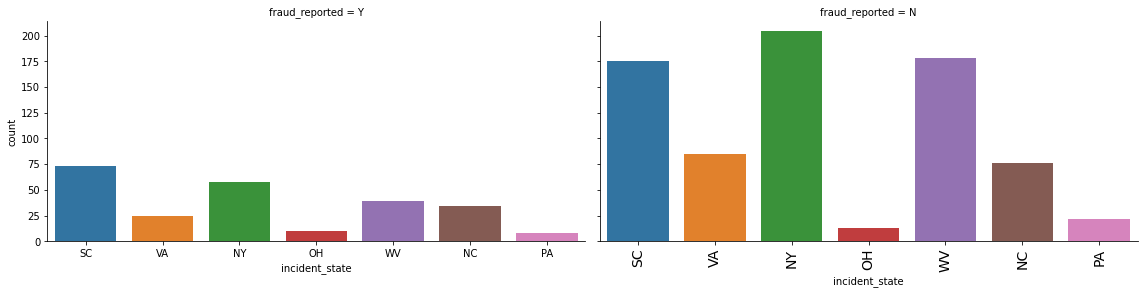

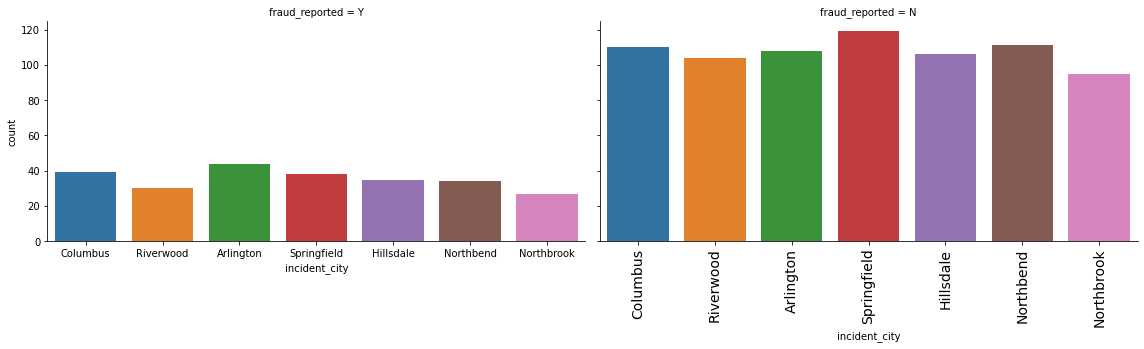

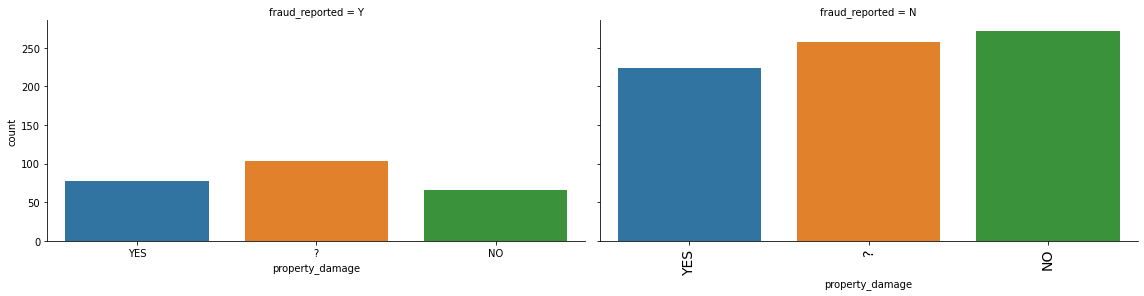

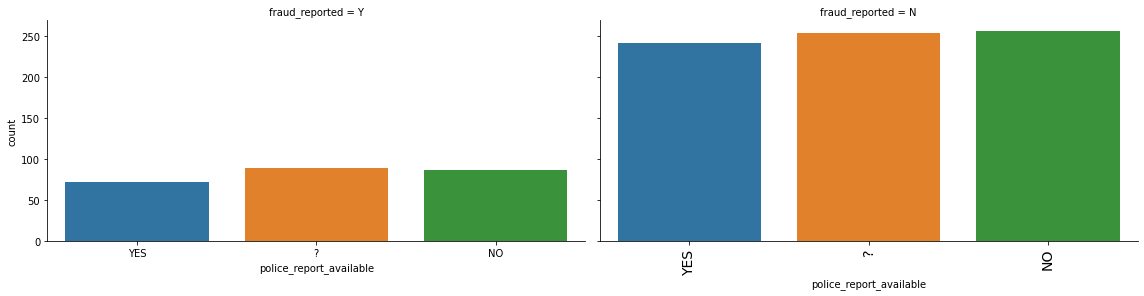

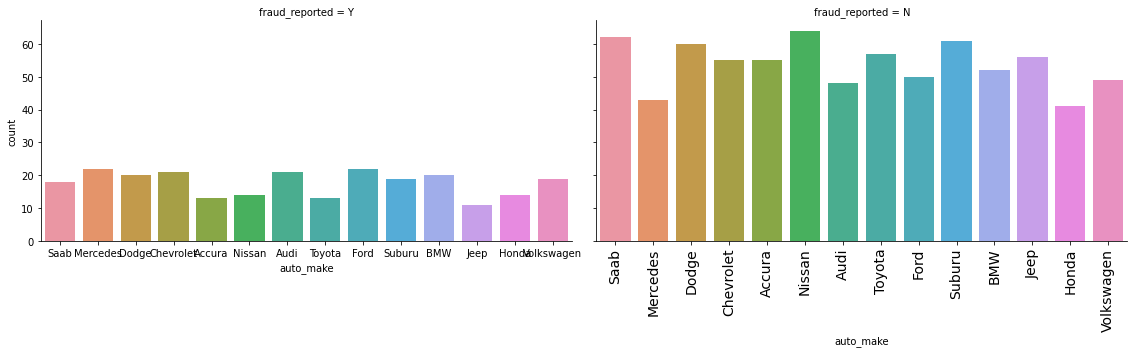

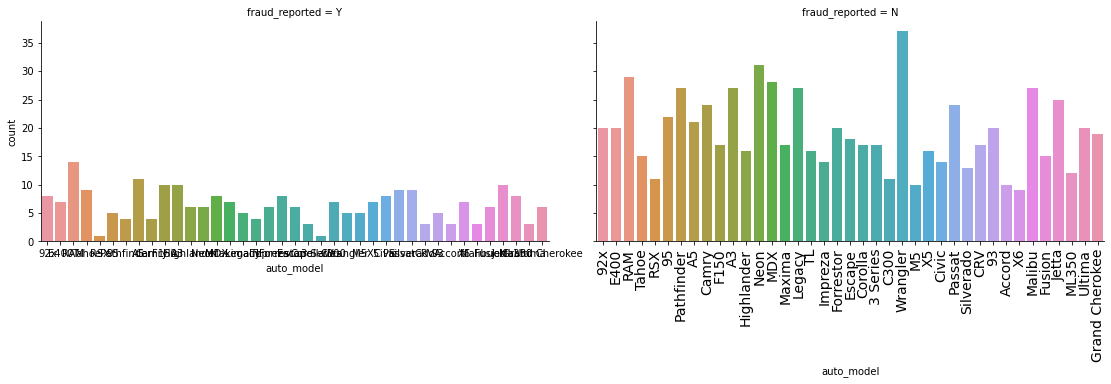

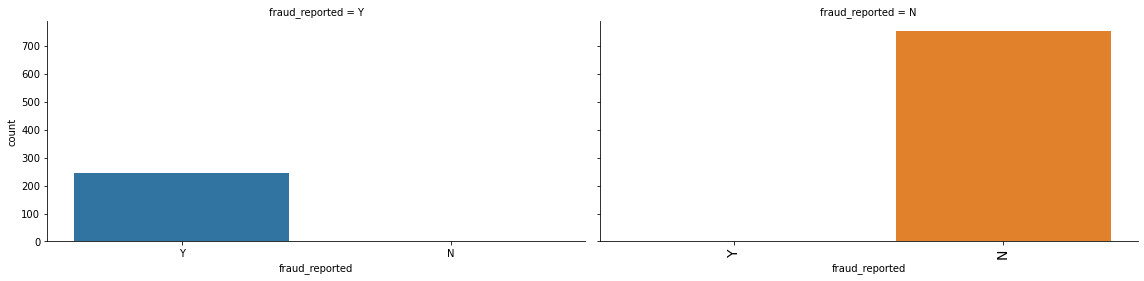

In [18]:
for col in obj_data:
    sns.catplot(x=col,col='fraud_reported',data=df_insurance,kind='count',height=4,aspect=2)
    plt.xticks(rotation=90,fontsize=14)

- From policy_state plot, we see that majority of people who claimed for fraud insurance belonged to OH, and also the highest number of people that haven't reported fraud were Oh and IL.
- Majority of People who claim fraud have equal count for male and female.
- Majority of People who claimed fraud have hobbies like playing chess.
- Majority of people who claimed fraud have relationship status as other-relative.
- Majority of people who claimed fraud have incident_type status as single and multi-vehicle collision.
- Majority of people who claimed fraud have collision_type status as rear collision.
- Majority of People who claimed fraud have incident_severity status as major damage and very less people who have status as trivial damage.
- Majority of People who claimed fraud have incident_state SC.
- Majority of People who claimed fraud have incident_city as Arlington.

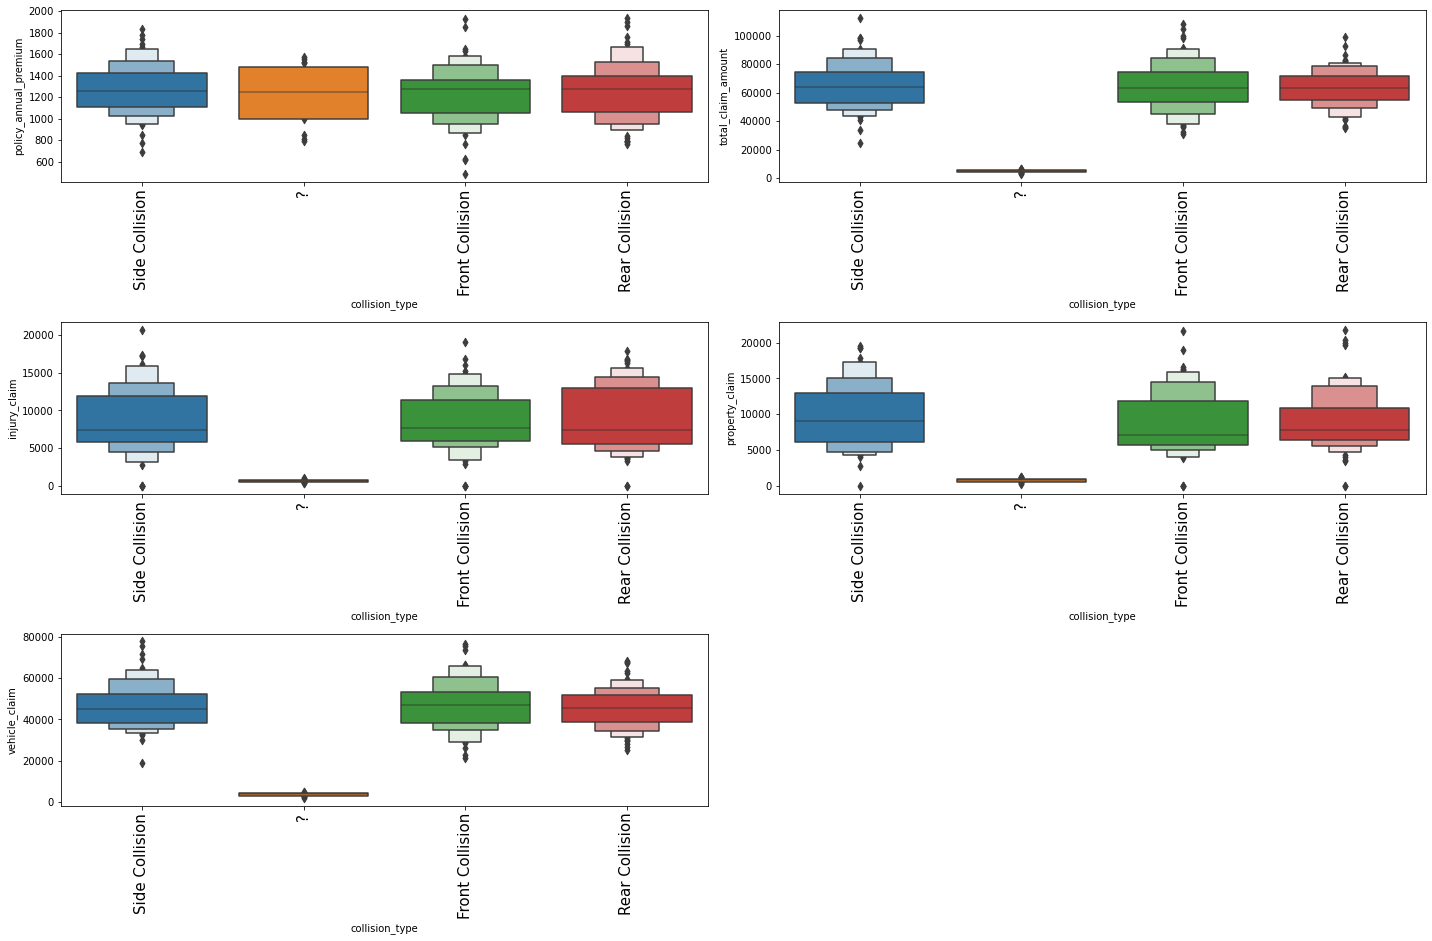

In [19]:
#Checking boxenplot for the feature columns
df=df_insurance.query("fraud_reported=='Y'")
features=['policy_annual_premium','total_claim_amount','injury_claim','property_claim', 'vehicle_claim']

plt.figure(figsize=(20,85))
for i in range(len(features)):
    plt.subplot(20,2,i+1)
    sns.boxenplot(x=df['collision_type'],y=df[features[i]])
    plt.tight_layout()
    plt.xticks(rotation=90,fontsize=15)

- From plot 1, we see that people who have claimed fraud insurance they have policy_annual_premium whose min value is between 1300 and max value is approx 1800, and where collision type is ? people mostly have claimed 25% to 75%; and for front and rear collision type, people have claimed mostly 25% of the value.
- From total_claim_amount vs Collision_type plot, we see that for side and front collision people have claimed maximum of 90000, and for front collision, the value is around 75000.
- From injury_claim plot, we see that wherever fraud is yes, side and rear collision have same max value of 15000 and min value of 700.
- From property_claim plot, we see that wherever fraud is yes, side collision have 9000 as min value and 17000 as max values; and front and rear collision have min value as 6000 and max value as 11000; for side collision mostly people have claimed more than 50% of value which is same with Front and rear collision.
- From vehicle_claim plot, wherever fraud is yes we can say that rear and side have almmost same min value, and front have a little different value.

In the above points, the values term that we used is the amount of money people have claimed; min value means the minimum amount of money people have claimed and max value reprenets the maximum amount of money that people have claimed in name of fraud.

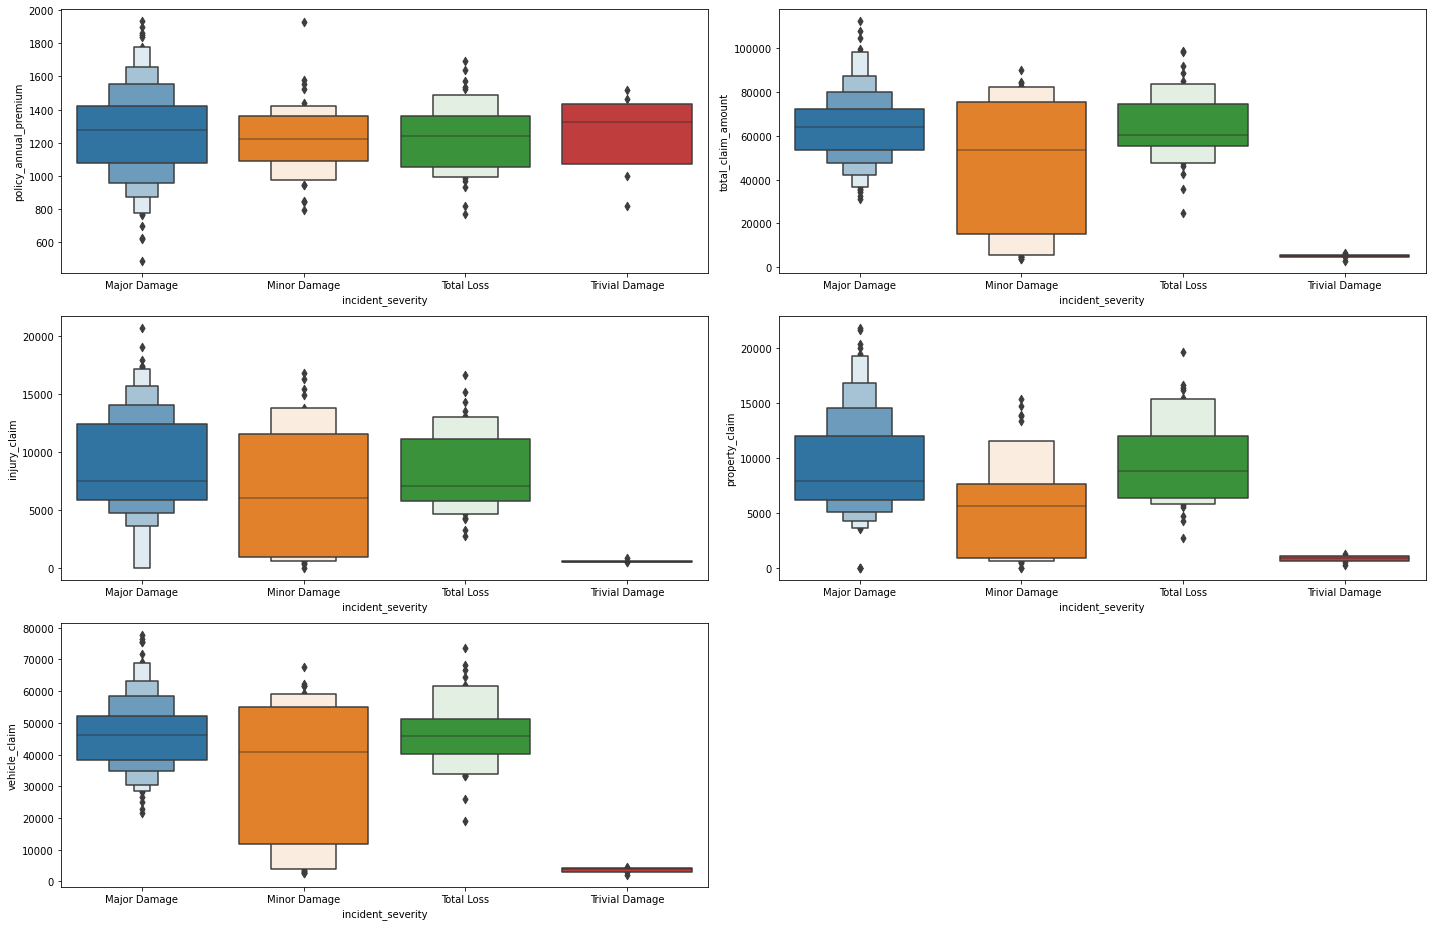

In [20]:
#checking boxenplot for incident_severity vs various amount claiming schemes
plt.figure(figsize=(20,85))
for i in range(len(features)):
    plt.subplot(20,2,i+1)
    sns.boxenplot(x=df['incident_severity'],y=df[features[i]])
    plt.tight_layout()

- From policy_annual_premium, we see that for minor damage mostly people claim value between 25-75% though there are some outliers present who have claimed for min and max values; and for trivial damage, we see that mostly people have claim for values less than average.
- From total_claim_amount plot, we see that for minor damage, mostly people have claimed value that is less than average which can be 25% of the value.
- From injury_claim plot, we can see that for major damage people have claimed more than the mean value; for major damage, we see that mostly people have claimed 25% or 75% of value; and for total loss, mostly people have claimed more than mean value.
- From property_claim plot, we see that for major damage the values mostly lies above mean i.e., for major damage people get more money and for minor damage people get value that is less than mean or average.
- From vehicle_claim plot, we see that for minor damage people mostly get money that is less than mean and a very less no.of people get amount that is greater than mean value. For trivial damage, we see that very less amount people get for all the factors.

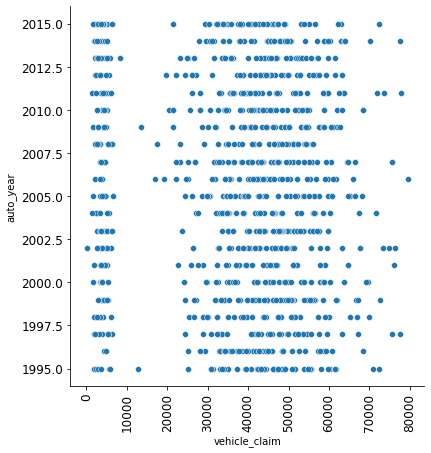

In [21]:
#Checking relplot for the feature columns
sns.relplot(y='auto_year',x='vehicle_claim',data=df_insurance,height=6)
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=12)
plt.show()

 From the above plot, we see that as the years are increasing the vehicle_claim value is not increasing; it is almost same for all the years.

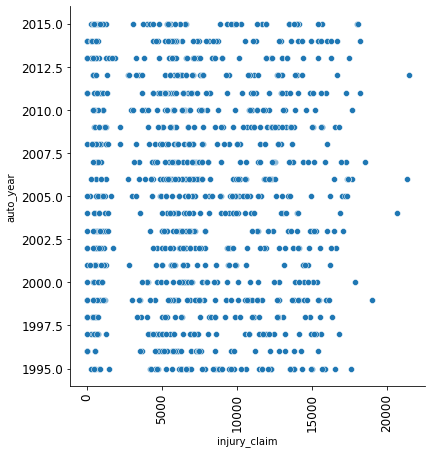

In [22]:
sns.relplot(y='auto_year',x='injury_claim',data=df_insurance,height=6)
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=12)
plt.show()

From the above plot, we see that the injury_claim value is not increasing as the year are increasing. The values are almost same for all the years.

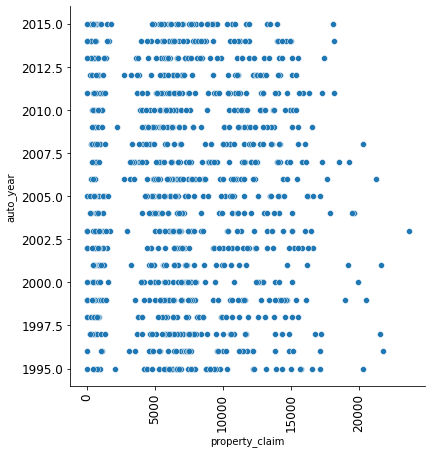

In [23]:
sns.relplot(y='auto_year',x='property_claim',data=df_insurance,height=6)
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=12)
plt.show()

From the above plot, we see that the property_claim value is not increasing as the year are increasing. The values are almost same for all the years.

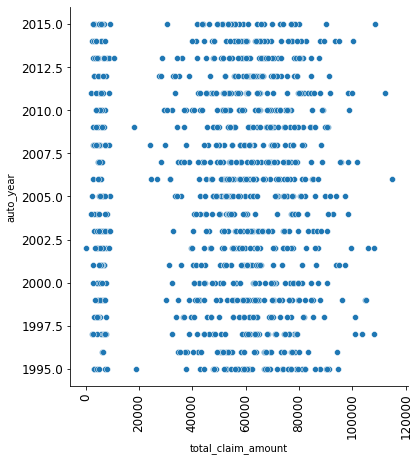

In [24]:
sns.relplot(y='auto_year',x='total_claim_amount',data=df_insurance,height=6)
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=12)
plt.show()

From the above plot, we can see that Total claim amount value is almost same as the years increasing.

## Encoding the Categorical data:

In [25]:
#using ordinalencoder as all the column values are in order.
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
def ordinal_transform(df_insurance,col):
    df_insurance[col]=oe.fit_transform(df_insurance[col])
    return df_insurance

In [26]:
df_insurance = ordinal_transform(df_insurance, obj_data)

In [27]:
df_insurance

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_bind_year,policy_bind_month,policy_bind_day
0,328,48,521585,2.0,1.0,1000,1406.91,0,466132,1.0,...,6510,13020,52080,10.0,1.0,2004,1.0,2014,10,17
1,228,42,342868,1.0,1.0,2000,1197.22,5000000,468176,1.0,...,780,780,3510,8.0,12.0,2007,1.0,2006,6,27
2,134,29,687698,2.0,0.0,2000,1413.14,5000000,430632,0.0,...,7700,3850,23100,4.0,30.0,2007,0.0,2000,6,9
3,256,41,227811,0.0,1.0,2000,1415.74,6000000,608117,0.0,...,6340,6340,50720,3.0,34.0,2014,1.0,1990,5,25
4,228,44,367455,0.0,2.0,1000,1583.91,6000000,610706,1.0,...,1300,650,4550,0.0,31.0,2009,0.0,2014,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,2.0,2.0,1000,1310.80,0,431289,0.0,...,17440,8720,61040,6.0,6.0,2006,0.0,1991,7,16
996,285,41,186934,0.0,0.0,1000,1436.79,0,608177,0.0,...,18080,18080,72320,13.0,28.0,2015,0.0,2014,5,1
997,130,34,918516,2.0,1.0,500,1383.49,3000000,442797,0.0,...,7500,7500,52500,11.0,19.0,1996,0.0,2003,2,17
998,458,62,533940,0.0,2.0,2000,1356.92,5000000,441714,1.0,...,5220,5220,36540,1.0,5.0,1998,0.0,2011,11,18


## Multivariate Analysis:

In [28]:
#Checking Correlation
df_insurance.corr()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_bind_year,policy_bind_month,policy_bind_day
months_as_customer,1.000000,0.922098,0.057555,-0.000328,-0.026819,0.026807,0.005018,0.015498,0.017895,0.060925,...,0.065329,0.034940,0.061013,0.047655,0.004202,-0.000292,0.020544,-0.048276,0.005750,0.051728
age,0.922098,1.000000,0.059413,-0.014533,-0.015185,0.029188,0.014404,0.018126,0.025604,0.073337,...,0.075522,0.060898,0.062588,0.030410,0.017343,0.001354,0.012143,-0.037444,0.015501,0.053869
policy_number,0.057555,0.059413,1.000000,0.072815,0.038917,-0.006738,0.022566,0.008968,0.007083,0.004564,...,-0.008762,-0.010678,-0.020184,0.023860,0.065240,-0.000183,-0.029443,-0.040099,0.005509,0.041885
policy_state,-0.000328,-0.014533,0.072815,1.000000,0.001027,0.010033,0.012455,-0.029580,0.008777,-0.020481,...,-0.046290,0.008406,0.001425,0.017124,-0.025253,0.002114,0.029432,-0.007276,0.071450,0.002277
policy_csl,-0.026819,-0.015185,0.038917,0.001027,1.000000,0.003384,0.023978,0.021636,0.006879,-0.010757,...,-0.078818,-0.042216,-0.046791,-0.004701,0.047885,-0.033082,-0.037190,-0.016466,-0.045345,0.018973
policy_deductable,0.026807,0.029188,-0.006738,0.010033,0.003384,1.000000,-0.003245,0.010870,0.004545,-0.009733,...,0.039107,0.064792,0.005269,-0.035379,-0.003268,0.026105,0.014817,-0.049598,-0.050416,0.009164
policy_annual_premium,0.005018,0.014404,0.022566,0.012455,0.023978,-0.003245,1.000000,-0.006247,0.032354,0.038853,...,-0.017633,-0.011654,0.020246,0.000045,-0.031849,-0.049226,-0.014480,0.001249,-0.035355,-0.025183
umbrella_limit,0.015498,0.018126,0.008968,-0.029580,0.021636,0.010870,-0.006247,1.000000,0.019671,0.010688,...,-0.045412,-0.023790,-0.038584,-0.004443,0.040256,0.009893,0.058622,0.048008,0.009961,-0.045207
insured_zip,0.017895,0.025604,0.007083,0.008777,0.006879,0.004545,0.032354,0.019671,1.000000,-0.036942,...,-0.017495,-0.006841,-0.041083,-0.020892,0.023637,-0.032736,0.019368,-0.001100,0.015864,-0.039867
insured_sex,0.060925,0.073337,0.004564,-0.020481,-0.010757,-0.009733,0.038853,0.010688,-0.036942,1.000000,...,0.000924,-0.014868,-0.029609,0.026457,-0.018421,-0.028247,0.030873,-0.032891,-0.004033,0.040713


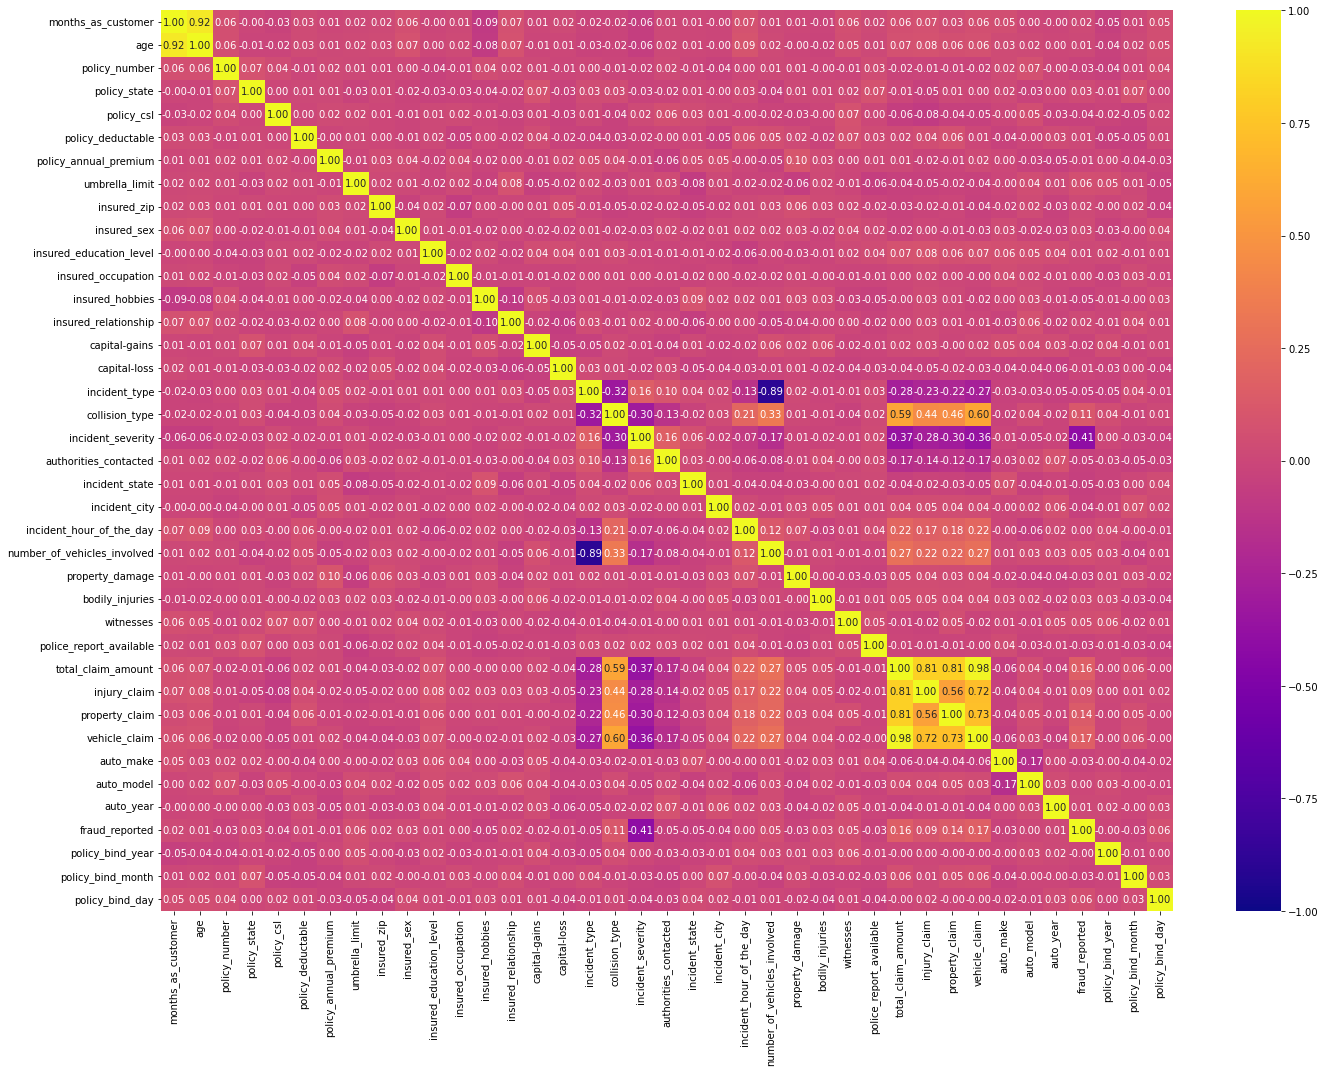

In [29]:
df_correlation = df_insurance.corr()

plt.figure(figsize = (20,15))
sns.heatmap(df_correlation, vmin=-1, vmax= 1, annot=True, cmap="plasma", fmt='.2f')
plt.tight_layout()

In the above heatmap we are not being able to observe the correlation details clearly but still we can point out that there are few columns which are multicollinear. However they seem to add weightage in the model prediction, hence we would keep them.

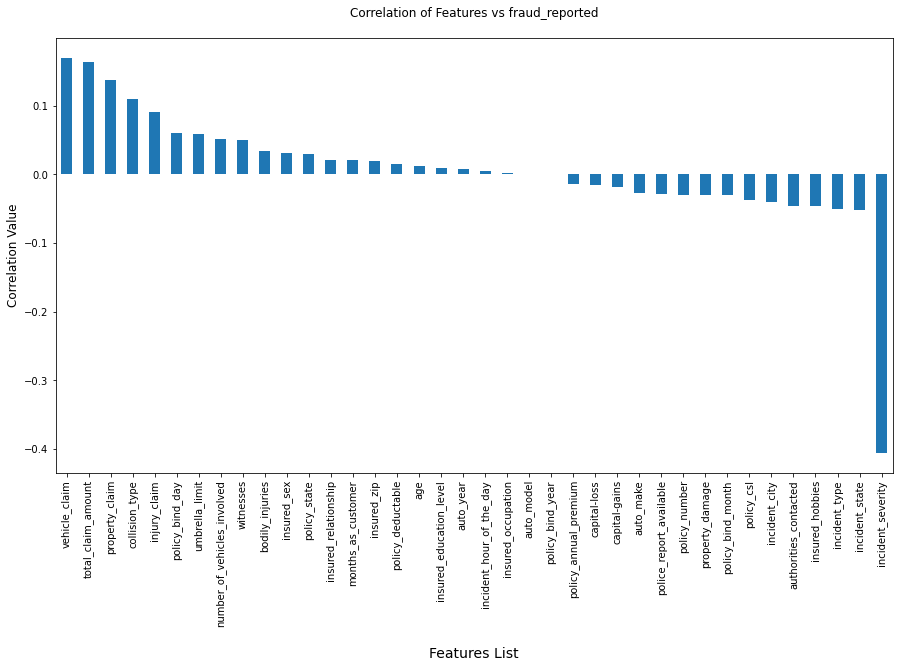

In [30]:
#using barplot to check correlation
df_correlation = df_insurance.corr()
plt.figure(figsize=(15,8))
df_correlation['fraud_reported'].sort_values(ascending=False).drop('fraud_reported').plot.bar()
plt.title("Correlation of Features vs fraud_reported\n", fontsize=12)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()

Since the heatmap was not able to give us a clearer picture of positive and negative correlation columns so we have generated this bar plot. We see that more than half the feature columns are positively correlated with our target column while all the remaining features are negatively correlated which indicates that all the columns are required for the model prediction.

In [31]:
#dropping a column as it is not providing much information 
df_insurance.drop(['months_as_customer'], axis=1, inplace=True)
df_insurance

,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_bind_year,policy_bind_month,policy_bind_day
0,48,521585,2.0,1.0,1000,1406.91,0,466132,1.0,4.0,...,6510,13020,52080,10.0,1.0,2004,1.0,2014,10,17
1,42,342868,1.0,1.0,2000,1197.22,5000000,468176,1.0,4.0,...,780,780,3510,8.0,12.0,2007,1.0,2006,6,27
2,29,687698,2.0,0.0,2000,1413.14,5000000,430632,0.0,6.0,...,7700,3850,23100,4.0,30.0,2007,0.0,2000,6,9
3,41,227811,0.0,1.0,2000,1415.74,6000000,608117,0.0,6.0,...,6340,6340,50720,3.0,34.0,2014,1.0,1990,5,25
4,44,367455,0.0,2.0,1000,1583.91,6000000,610706,1.0,0.0,...,1300,650,4550,0.0,31.0,2009,0.0,2014,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,38,941851,2.0,2.0,1000,1310.80,0,431289,0.0,5.0,...,17440,8720,61040,6.0,6.0,2006,0.0,1991,7,16
996,41,186934,0.0,0.0,1000,1436.79,0,608177,0.0,6.0,...,18080,18080,72320,13.0,28.0,2015,0.0,2014,5,1
997,34,918516,2.0,1.0,500,1383.49,3000000,442797,0.0,5.0,...,7500,7500,52500,11.0,19.0,1996,0.0,2003,2,17
998,62,533940,0.0,2.0,2000,1356.92,5000000,441714,1.0,0.0,...,5220,5220,36540,1.0,5.0,1998,0.0,2011,11,18


## Preparation for model building

In [32]:
x=df_insurance.drop('fraud_reported',axis=1)
y=df_insurance['fraud_reported']

## Checking outliers using boxplot:

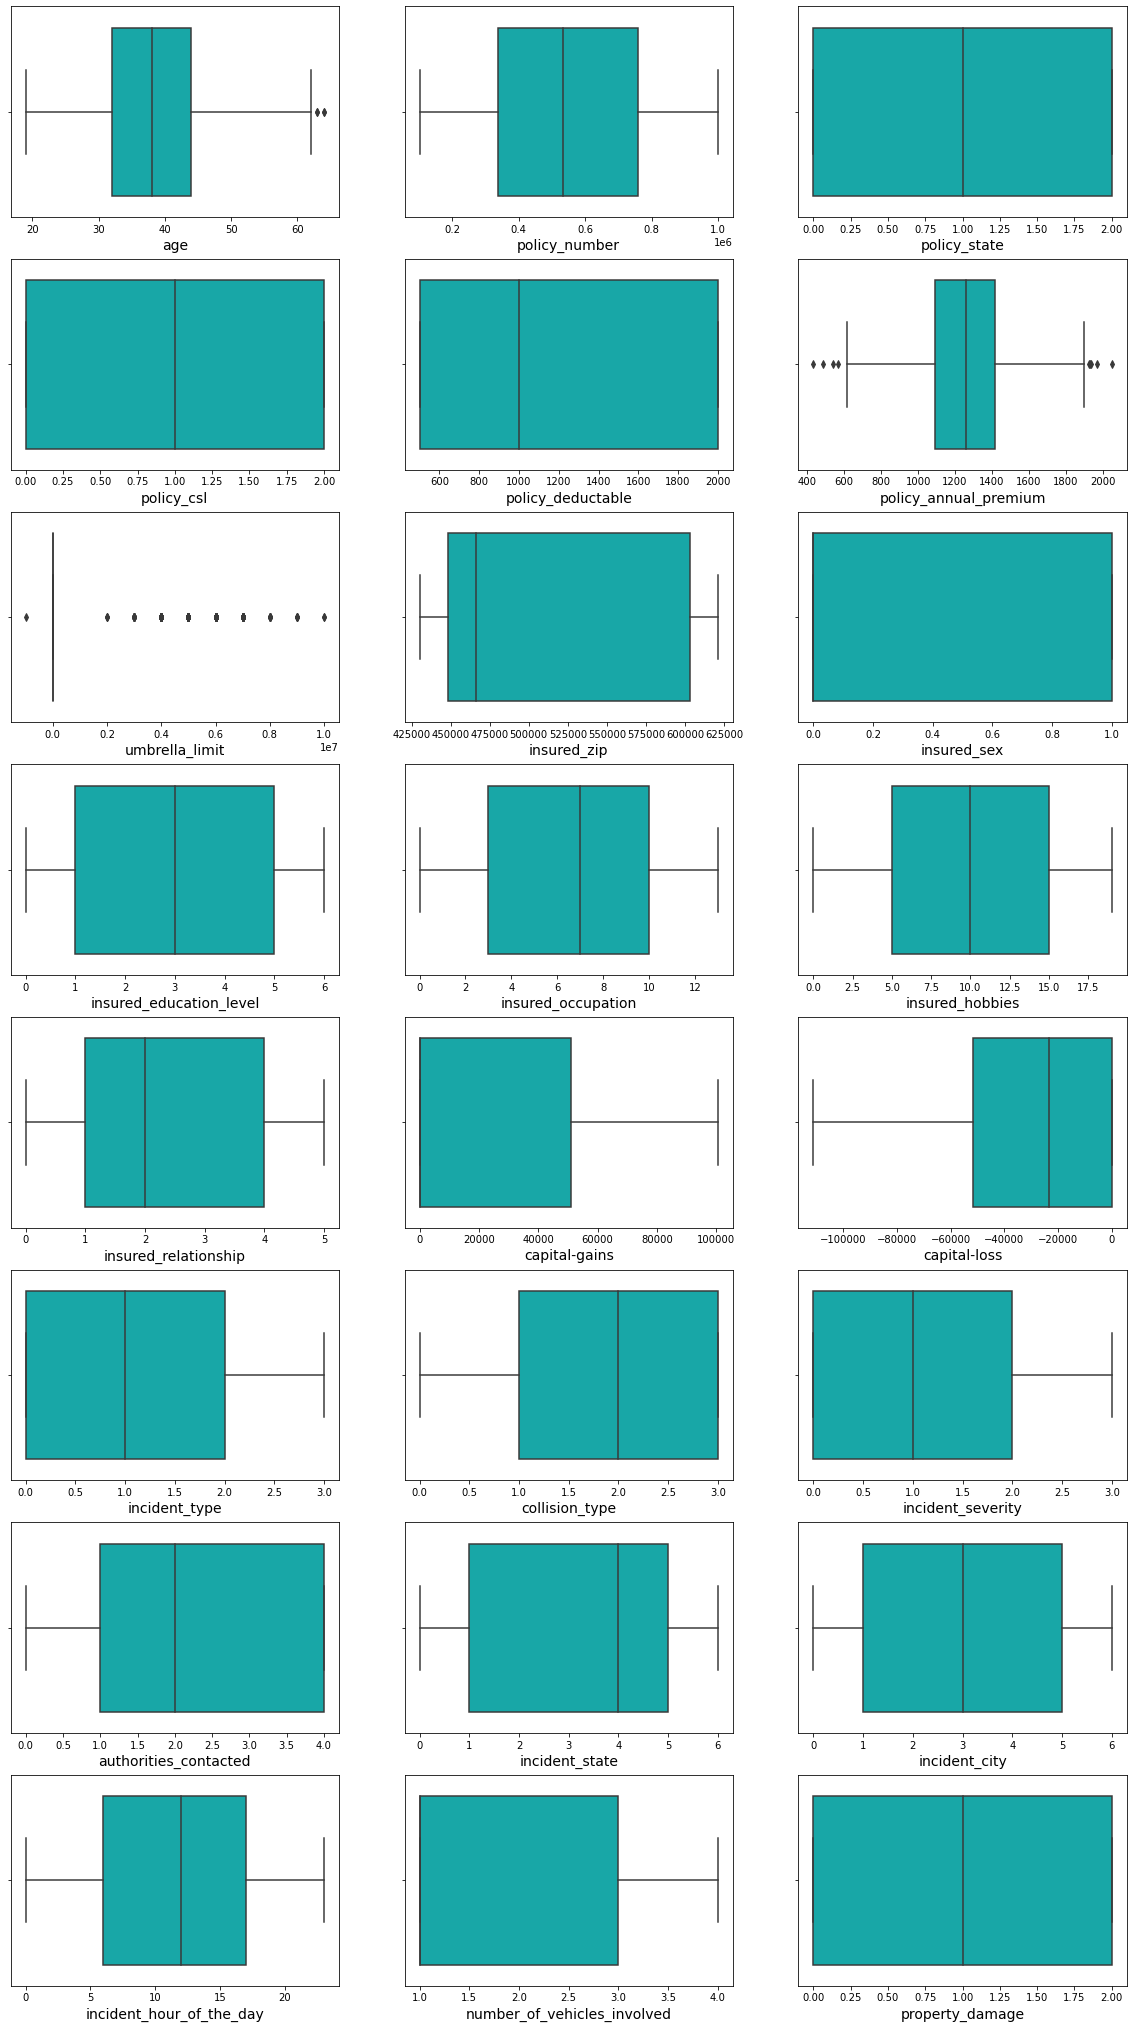

In [33]:
plt.figure(figsize = (20,55))
plot_number = 1

for i in x:
    if plot_number <= 24: 
        plt.subplot(12,3,plot_number)
        sns.boxplot(x[i], color = 'c')
        plt.xlabel(i,fontsize=14)
        
    plot_number += 1
plt.show()

We see that there are outliers present in some of the columns.

## Remove outliers:

In [34]:
#using percentile method to remove the outliers
for col in x.columns:
    percentile=x[col].quantile([0.01,0.98]).values
    x[col][x[col]<=percentile[0]]=percentile[0]
    x[col][x[col]>=percentile[1]]=percentile[1]

Here we have removed the outliers with the percentile method.

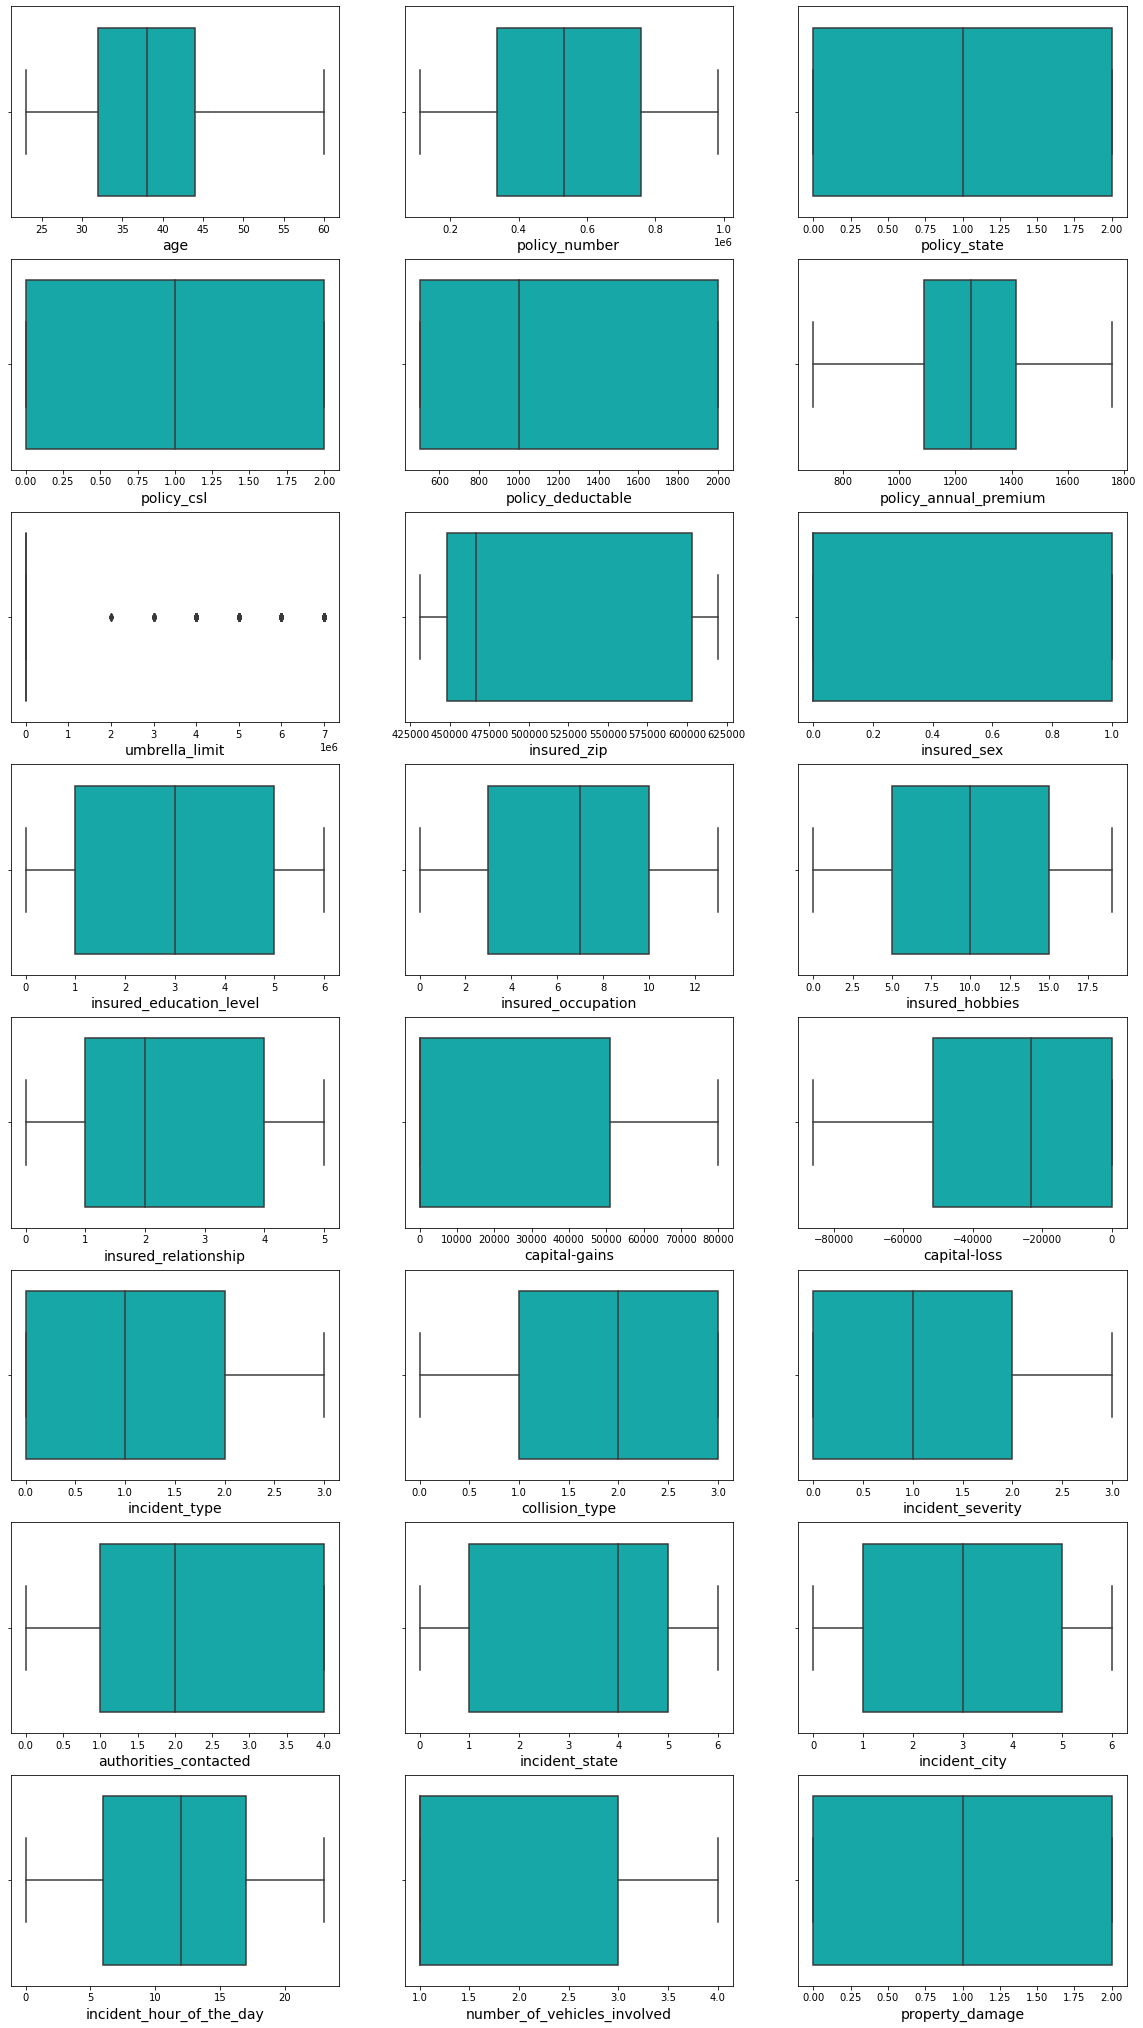

In [35]:
#checking outliers after removal
plt.figure(figsize = (20,55))
plot_number = 1

for i in x:
    if plot_number <= 24: 
        plt.subplot(12,3,plot_number)
        sns.boxplot(x[i], color = 'c')
        plt.xlabel(i,fontsize=14)
        
    plot_number += 1
plt.show()

we have successfully removed the outliers.

## Resolving the class imbalance issue in the target column using SMOTE method:

Our dataset contains imbalanced data so we are going to use SMOTE technique to balance the imbalnced data.

In [36]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
x_res,y_res=smote.fit_resample(x,y)
x_new=pd.DataFrame(x_res,columns=x.columns)
y_new=pd.DataFrame(y_res,columns=['fraud_reported'])

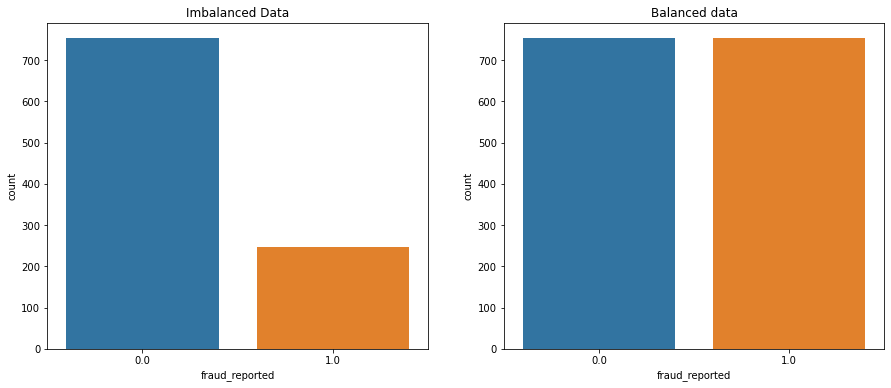

In [37]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.countplot(df_insurance['fraud_reported'])
plt.title("Imbalanced Data")
plt.subplot(1,2,2)
sns.countplot(y_new['fraud_reported'])
plt.title("Balanced data")
plt.show()

Data has been balanced so now our model can predict every class with good accuracy.

In [38]:
#checking the shape of data before and after balancing
print(df_insurance.shape)
print(x_new.shape)

(1000, 38)
(1506, 37)


## Checking skewness:

In [39]:
x_new.skew()

age                            0.488373
policy_number                  0.112950
policy_state                  -0.030939
policy_csl                     0.086537
policy_deductable              0.502127
policy_annual_premium         -0.029515
umbrella_limit                 1.581303
insured_zip                    0.823461
insured_sex                    0.122706
insured_education_level        0.003581
insured_occupation            -0.030164
insured_hobbies               -0.001944
insured_relationship           0.056901
capital-gains                  0.499159
capital-loss                  -0.345970
incident_type                  0.131571
collision_type                -0.305749
incident_severity              0.607009
authorities_contacted         -0.102645
incident_state                -0.111363
incident_city                  0.081171
incident_hour_of_the_day      -0.020769
number_of_vehicles_involved    0.591398
property_damage                0.181730
bodily_injuries                0.237318


We see that there is no skewness in continuous columns and we don't need to remove skewness for categorical columns.

## Feature Scaling:

In [40]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_new=scaler.fit_transform(x_new)
x_new=pd.DataFrame(x_new,columns=x.columns)

We are scaling the feature data to ensure that there is no issue with the data biasness over a particular column instead a standardization will occur helping us in having a uniform dataset value.

## Training multiple models:

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
import scikitplot as skplt
from yellowbrick.classifier.rocauc import roc_auc

In [42]:
models_classification={
    "LogisticRegression":LogisticRegression(),
    "DecisionTreeClassifier":DecisionTreeClassifier(),
    "RandomForestClassifier":RandomForestClassifier(),
    "AdaBoostClassifier":AdaBoostClassifier(),
    "GradientBoostingClassifier":GradientBoostingClassifier(),
    "SupportVectorClassifier":SVC()
}

## Finding Best Random State

In [43]:
maxAccuracy = 0
maxRandomState = 0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x_new,y_new, test_size=.20, random_state=i)
    dtc= DecisionTreeClassifier()
    dtc.fit(x_train, y_train)
    pred_dtc = dtc.predict(x_test)
    acc=accuracy_score(y_test,pred_dtc)
    if acc>maxAccuracy:
        maxAccuracy=acc
        maxRandomState=i
print("Best accuracy is ",maxAccuracy, "on Random_state ", maxRandomState)

Best accuracy is  0.8841059602649006 on Random_state  125


In [44]:
#splitting the train test data
x_train,x_test,y_train,y_test=train_test_split(x_new,y_new,test_size=.20,random_state=125)

## Finding the best model:

-------------------- LogisticRegression --------------------
Accuracy_Score 0.7649006622516556
SCORE 0.7649006622516556
Confusion metrics
[[102  35]
 [ 36 129]]
CLASSIFICATION REPORT
              precision    recall  f1-score   support

         0.0       0.74      0.74      0.74       137
         1.0       0.79      0.78      0.78       165

    accuracy                           0.76       302
   macro avg       0.76      0.76      0.76       302
weighted avg       0.77      0.76      0.76       302

Cross_Val_Score 0.7550174913643264
ROC AUC CURVE


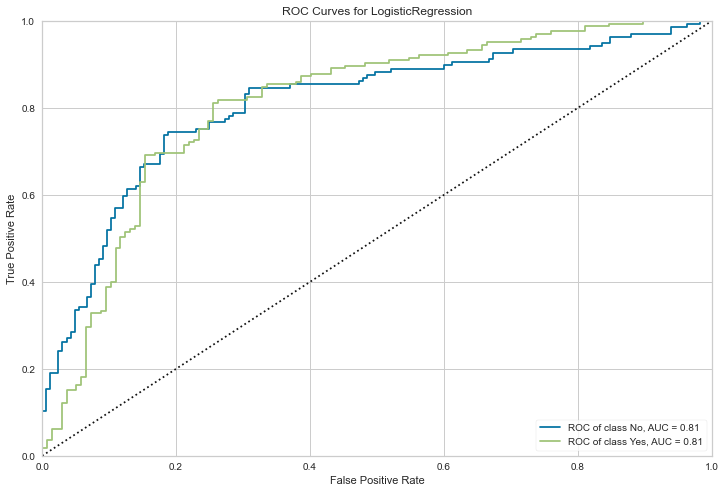

MODEL LEARNING CURVE


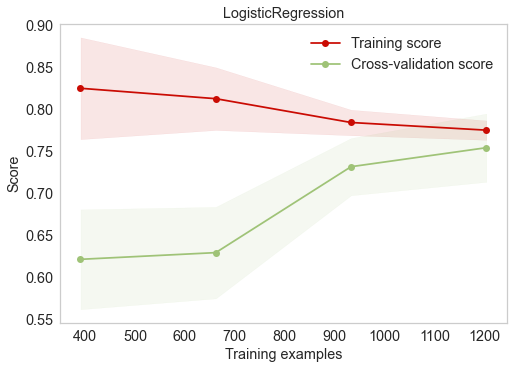

-------------------- DecisionTreeClassifier --------------------
Accuracy_Score 0.8841059602649006
SCORE 0.8841059602649006
Confusion metrics
[[117  20]
 [ 15 150]]
CLASSIFICATION REPORT
              precision    recall  f1-score   support

         0.0       0.89      0.85      0.87       137
         1.0       0.88      0.91      0.90       165

    accuracy                           0.88       302
   macro avg       0.88      0.88      0.88       302
weighted avg       0.88      0.88      0.88       302

Cross_Val_Score 0.8280653891003498
ROC AUC CURVE


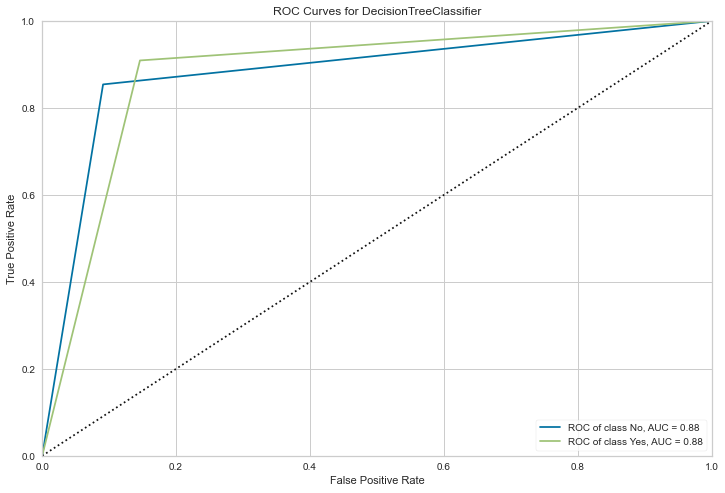

MODEL LEARNING CURVE


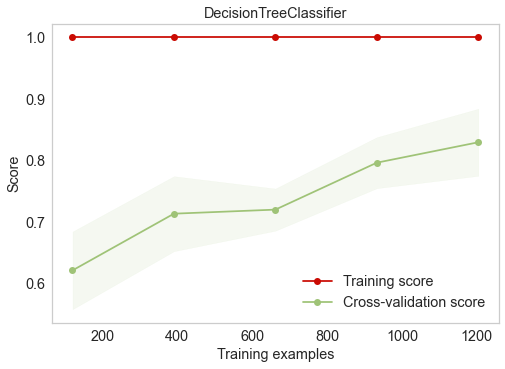

-------------------- RandomForestClassifier --------------------
Accuracy_Score 0.8609271523178808
SCORE 0.8609271523178808
Confusion metrics
[[120  17]
 [ 25 140]]
CLASSIFICATION REPORT
              precision    recall  f1-score   support

         0.0       0.83      0.88      0.85       137
         1.0       0.89      0.85      0.87       165

    accuracy                           0.86       302
   macro avg       0.86      0.86      0.86       302
weighted avg       0.86      0.86      0.86       302

Cross_Val_Score 0.8606675320675012
ROC AUC CURVE


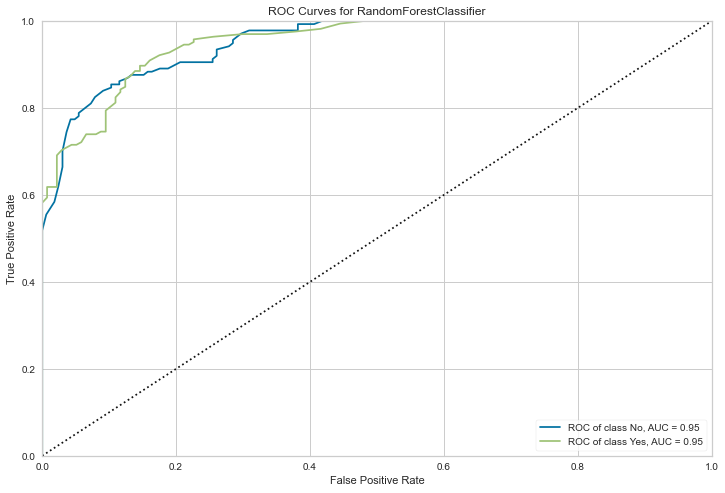

MODEL LEARNING CURVE


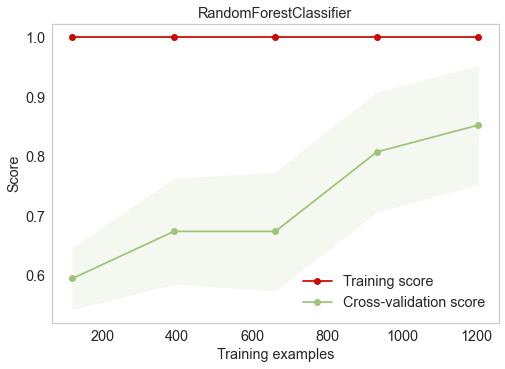

-------------------- AdaBoostClassifier --------------------
Accuracy_Score 0.8576158940397351
SCORE 0.8576158940397351
Confusion metrics
[[123  14]
 [ 29 136]]
CLASSIFICATION REPORT
              precision    recall  f1-score   support

         0.0       0.81      0.90      0.85       137
         1.0       0.91      0.82      0.86       165

    accuracy                           0.86       302
   macro avg       0.86      0.86      0.86       302
weighted avg       0.86      0.86      0.86       302

Cross_Val_Score 0.8407581791379728
ROC AUC CURVE


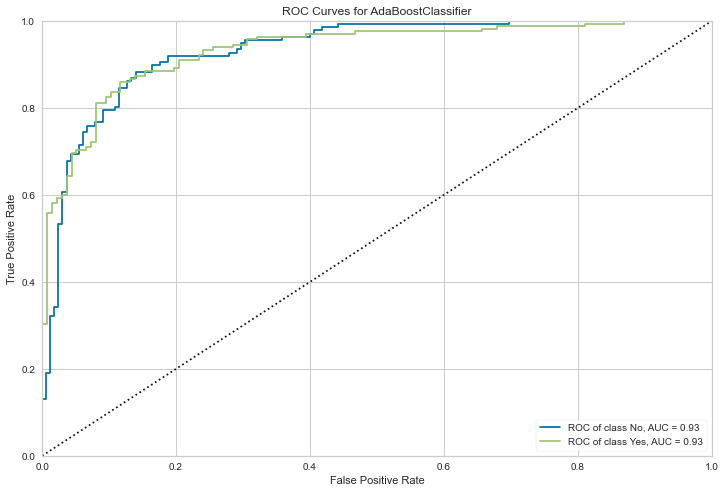

MODEL LEARNING CURVE


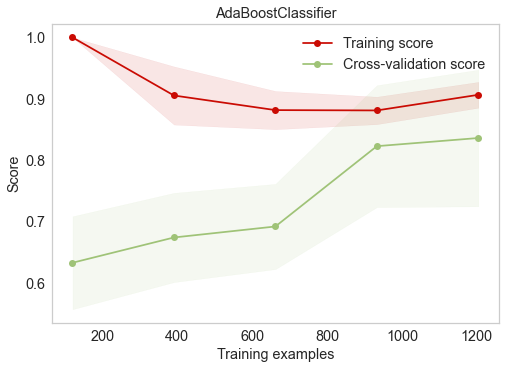

-------------------- GradientBoostingClassifier --------------------
Accuracy_Score 0.8874172185430463
SCORE 0.8874172185430463
Confusion metrics
[[118  19]
 [ 15 150]]
CLASSIFICATION REPORT
              precision    recall  f1-score   support

         0.0       0.89      0.86      0.87       137
         1.0       0.89      0.91      0.90       165

    accuracy                           0.89       302
   macro avg       0.89      0.89      0.89       302
weighted avg       0.89      0.89      0.89       302

Cross_Val_Score 0.8646344414864361
ROC AUC CURVE


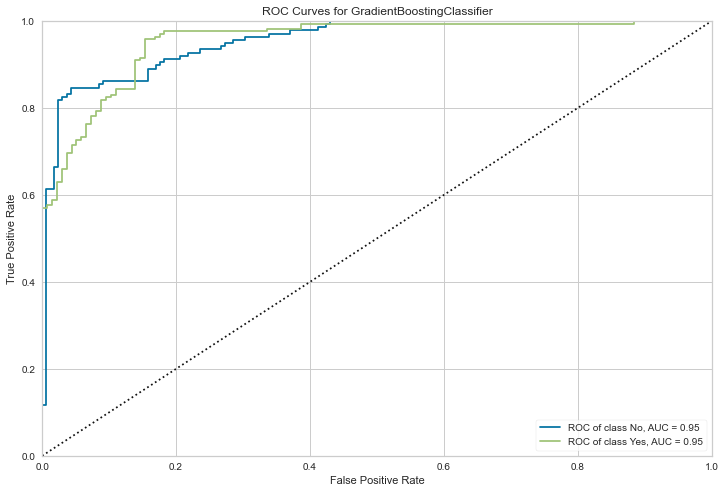

MODEL LEARNING CURVE


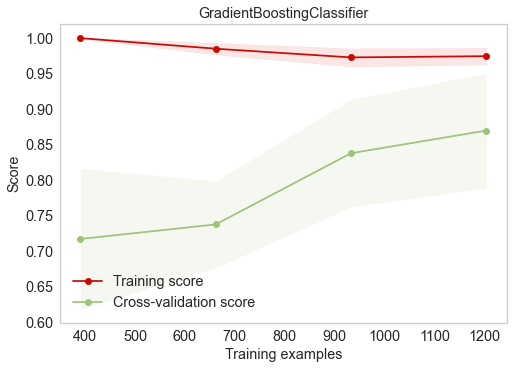

-------------------- SupportVectorClassifier --------------------
Accuracy_Score 0.8344370860927153
SCORE 0.8344370860927153
Confusion metrics
[[119  18]
 [ 32 133]]
CLASSIFICATION REPORT
              precision    recall  f1-score   support

         0.0       0.79      0.87      0.83       137
         1.0       0.88      0.81      0.84       165

    accuracy                           0.83       302
   macro avg       0.83      0.84      0.83       302
weighted avg       0.84      0.83      0.83       302

Cross_Val_Score 0.8453719390112427
ROC AUC CURVE


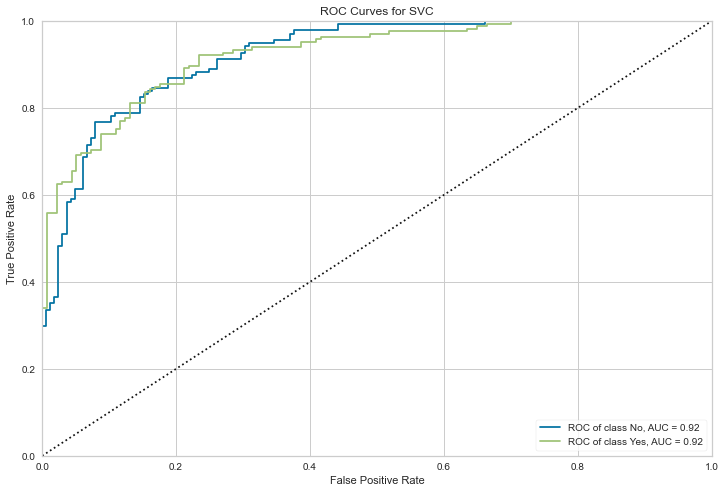

MODEL LEARNING CURVE


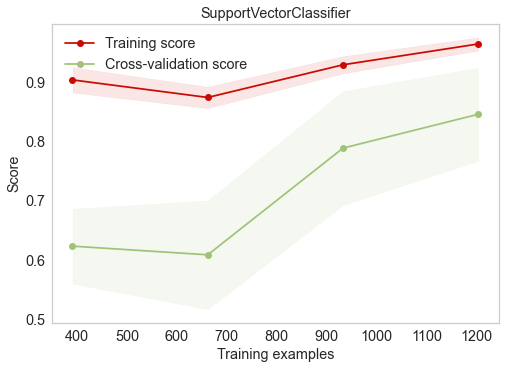

In [45]:
Score=[]
CVS=[]
MODEL=[]
for name,model in models_classification.items():
    print("-"*20,name,"-"*20)
    MODEL.append(name)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    ac=accuracy_score(y_test,y_pred)
    Score.append(ac)
    print("Accuracy_Score",ac)
    print("SCORE",model.score(x_test,y_test))
    cm=confusion_matrix(y_test,y_pred)
    print('Confusion metrics')
    print(cm)
    print("CLASSIFICATION REPORT")
    report=classification_report(y_test,y_pred)
    print(report)
    csv=cross_val_score(model,x_new,y_new,cv=5).mean()
    CVS.append(csv*100)
    print("Cross_Val_Score",csv)
    print("ROC AUC CURVE")
    plt.figure(figsize=(12,8))
    roc_auc(model,x_train,y_train,X_test=x_test,y_test=y_test,classes=['No','Yes'],micro=False,macro=False)

    print("MODEL LEARNING CURVE")
    skplt.estimators.plot_learning_curve(model,x_new,y_new,cv=5,scoring='accuracy',text_fontsize='large',title=name)
    plt.show()

In [46]:
#making a dataframe of the models
models_df=pd.DataFrame({
    'Models':MODEL,
    "Accuracy Score":Score,
    'Cross_val_score':CVS
})

models_df

,Models,Accuracy Score,Cross_val_score
0,LogisticRegression,0.764901,75.501749
1,DecisionTreeClassifier,0.884106,82.806539
2,RandomForestClassifier,0.860927,86.066753
3,AdaBoostClassifier,0.857616,84.075818
4,GradientBoostingClassifier,0.887417,86.463444
5,SupportVectorClassifier,0.834437,84.537194


## We are selecting Gradient Boosting Classifier as our best model since it is giving good cross_val_score of 0.86 as compared to other models.

## Hyperparameter tuning our best ML model:

In [47]:
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [48]:
gbc.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [49]:
param_class={
 'criterion': ['friedman_mse','squared_error','mse'],
 'max_depth': [None,1,2,3],
 'max_features': ['auto','sqrt','log2'],
 'min_samples_leaf': [1,2],
 'min_samples_split': [2,1,3]}

In [50]:
Grid_classifier=GridSearchCV(estimator=gbc,param_grid=param_class,cv=5)

In [51]:
Grid_classifier.fit(x_new,y_new)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['friedman_mse', 'squared_error', 'mse'],
                         'max_depth': [None, 1, 2, 3],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 1, 3]})

In [52]:
Grid_classifier.best_params_

{'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 2}

In [53]:
Grid_classifier.best_score_

0.8732371124947745

After successfully incorporating the Hyper Parameter Tuning on the Final Model we received the accuracy score for it i.e., 87.32%

## Final Model Learning Curve:

In [54]:
gbcr=GradientBoostingClassifier(
 criterion= 'squared_error',
 max_depth= None,
 max_features= 'auto',
 min_samples_leaf= 2,
 min_samples_split= 2)

## Cross Validation Score of Final Model:

In [55]:
new_cross_validation=cross_val_score(gbcr,x_new,y_new,cv=5).mean()
new_cross_validation

0.8745704164924865

In [56]:
gbcr.fit(x_train,y_train)
pred_gbcr=gbcr.predict(x_test)
print(accuracy_score(y_test,pred_gbcr))

0.9072847682119205


## ROC AUC Curve of Final ML Model:

ROC AUC CURVE


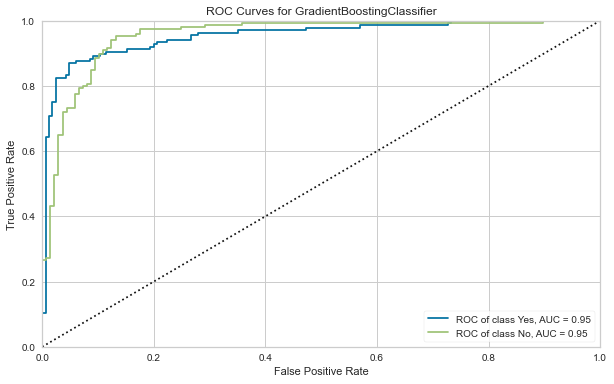

MODEL LEARNING CURVE


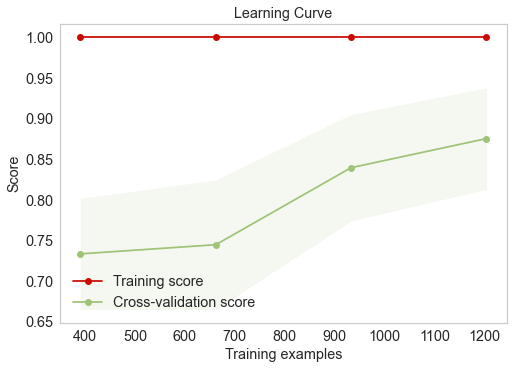

In [58]:
print("ROC AUC CURVE")
plt.figure(figsize=(10,6))
roc_auc(gbcr,x_train,y_train,X_test=x_test,y_test=y_test,classes=['Yes','No'],micro=False,macro=False)
print("MODEL LEARNING CURVE")
skplt.estimators.plot_learning_curve(gbcr,x_new,y_new,cv=5,scoring='accuracy',text_fontsize='large')
plt.show()

We have generated the ROC Curve for the final model and it shows the AUC score for the final model to be of 95% for both Yes or No class.

## Final Model Metrics:

In [59]:
print("Confusion Matrix")
print(confusion_matrix(y_test,pred_gbcr))
print("Classification_Report")
print(classification_report(y_test,pred_gbcr))
print("Accuracy Score",accuracy_score(y_test,pred_gbcr))

Confusion Matrix
[[120  17]
 [ 11 154]]
Classification_Report
              precision    recall  f1-score   support

         0.0       0.92      0.88      0.90       137
         1.0       0.90      0.93      0.92       165

    accuracy                           0.91       302
   macro avg       0.91      0.90      0.91       302
weighted avg       0.91      0.91      0.91       302

Accuracy Score 0.9072847682119205


## The Accuracy score of final classification model is 90.72%

## Saving the model:

In [61]:
import joblib
joblib.dump(gbcr,"Insurance_Claim_Model.obj")

['Insurance_Claim_Model.obj']

## Loading the model:

In [62]:
model=joblib.load('Insurance_Claim_Model.obj')

In [63]:
model.predict(x_test)

array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1.,
       0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0.,
       1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0.,
       1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1.,
       0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0.,
       0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1.,
       1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0.,
       1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1.,
       0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0.,
       0., 1., 0., 0., 0.

## Conclusion

1. In this dataset, we were asked to predict if an insurance claim made by customer is fraud or not making 'fraud_reported' as our target column.
2. We analyzed the dataset thoroughly and then we performed EDA to understand the effect of features on our target label.
3. We noted down all the observations that we made from the data visualization of the feature and target columns.
4. We found that the type of people who are doing fraud, the level of education they have, whether they have children or not and many other things.
5. There are imbalanced data in our datset which we balanced using SMOTE technique.
6. We have performed all the steps of data science life cycle in this project i.e., data pre-processing, data cleaning, Feature Engineering, Feature selection, Feature Transformation and then Model Building.
7. We performed model buildling using many models and we found that Gradient Boosting Classifier was giving good matrix so we selected this model and performed hyperparameter tuning to increase the accuracy. At the end, we have build a model with 90.72 % accuracy.
8. Finally, we saved the model for future prediction.